In [1]:
%%capture
import os
import site
site.addsitedir('/home/schirrmr/.local/lib/python2.7/site-packages/')
site.addsitedir('/usr/lib/pymodules/python2.7/')
os.sys.path.insert(0, '/home/schirrmr/braindecode/code/')
%cd /home/schirrmr/braindecode/code/braindecode/
assert 'THEANO_FLAGS' in os.environ
# switch to cpu
os.environ['THEANO_FLAGS'] = 'floatX=float32,device=cpu,nvcc.fastmath=True'
%load_ext autoreload
%autoreload 2
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'png' 

import matplotlib.lines as mlines
import seaborn
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
matplotlib.rcParams['font.size'] = 7
seaborn.set_style('darkgrid')

from braindecode.scripts.print_results import ResultPrinter
from braindecode.csp.print_results import CSPResultPrinter
import logging
log = logging.getLogger()
log.setLevel("DEBUG")


In [2]:
from braindecode.analysis.pandas_util import pairwise_compare_frame

In [322]:
df_merged_cnt_ours = load_data_frame('data/models/paper/ours/cnt//merged//', shorten_headers=False).drop(
    ['num_filters_4', 'num_filters_spat'], axis=1)

dataset_averaged_frame(remove_columns_with_same_value(df_merged_cnt_ours))

time  \
                                                                                                                len   
num_filters_time s_n_filters_time nonlin_before_merge low_cut_hz max_abs_threshold num_filters_2 num_filters_3        
24               30               elu                 0          400               48            72              20   
                                                      4          400               48            72              20   
25               40               elu                 0          400               50            100             20   
                                                                 800               50            100             20   
                                                      4          400               50            100             20   
                                                                 800               50            100             20   
                                  elu_identity        0          400               50            100             20   
                                                      4          400               50            100             20   

                                                                                                                         \
                                                                                                                  tmean   
num_filters_time s_n_filters_time nonlin_before_merge low_cut_hz max_abs_threshold num_filters_2 num_filters_3            
24               30               elu                 0          400               48            72            00:55:06   
                                                      4          400               48            72            00:47:34   
25               40               elu                 0          400               50            100           01:04:36   
                                                                 800               50            100           01:02:40   
                                                      4          400               50            100           01:04:27   
                                                                 800               50            100           01:05:49   
                                  elu_identity        0          400               50            100           01:01:31   
                                                      4          400               50            100           01:00:47   

                                                                                                                         \
                                                                                                                   tstd   
num_filters_time s_n_filters_time nonlin_before_merge low_cut_hz max_abs_threshold num_filters_2 num_filters_3            
24               30               elu                 0          400               48            72            00:20:38   
                                                      4          400               48            72            00:14:58   
25               40               elu                 0          400               50            100           00:19:07   
                                                                 800               50            100           00:22:56   
                                                      4          400               50            100           00:23:21   
                                                                 800               50            100           00:22:41   
                                  elu_identity        0          400               50            100           00:22:37   
                                                      4          400               50            100           00:16:04   

                                                                                             

In [290]:
pairwise_compare_frame(remove_columns_with_same_value(
    df_merged_cnt_ours.drop(['s_n_filters_time', 'num_filters_time',
                         'num_filters_3'], axis=1)))

,n_exp,val_1,val_2,acc_1,acc_2,diff,std
low_cut_hz,60,0,4,90.6,89.4,-1.2,4.4
nonlin_before_merge,40,elu_identity,elu,90.2,89.9,-0.3,2.5
num_filters_2,40,50,48,89.9,89.9,-0.0,2.6


In [268]:
remove_columns_with_same_value(df_merged_cnt_ours[df_merged_cnt_ours.dataset_filename.str.contains('GuJo')])

,nonlin_before_merge,low_cut_hz,time,test,test_sample,train
17,elu_identity,0,00:54:40,62.500,62.246868,100
18,elu,0,00:57:36,62.500,61.867824,100
19,elu_identity,4,01:20:13,61.875,60.598252,100
20,elu,4,01:04:52,61.875,61.407229,100


In [323]:
df_merged_cnt_bcic = load_data_frame('data/models/paper/bci-competition/cnt//merged//', shorten_headers=False)

dataset_averaged_frame(remove_columns_with_same_value(df_merged_cnt_bcic))

time  \
                                                                          len   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold        
False                   identity            0          400                  9   
                                            4          400                  9   
True                    elu                 0          400                  9   
                                                       800                  9   
                                            4          400                  9   
                                                       800                  9   

                                                                                   \
                                                                            tmean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold            
False                   identity            0          400               00:16:35   
                                            4          400               00:16:51   
True                    elu                 0          400               00:16:11   
                                                       800               00:29:26   
                                            4          400               00:17:55   
                                                       800               00:28:35   

                                                                                   \
                                                                             tstd   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold            
False                   identity            0          400               00:02:43   
                                            4          400               00:04:58   
True                    elu                 0          400               00:04:01   
                                                       800               00:06:03   
                                            4          400               00:08:01   
                                                       800               00:11:48   

                                                                          test  \
                                                                          mean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold         
False                   identity            0          400                72.4   
                                            4          400                66.9   
True                    elu                 0          400                73.2   
                                                       800                71.6   
                                            4          400                67.5   
                                                       800                66.2   

                                                                                \
                                                                           std   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold         
False                   identity            0          400                16.1   
                                            4          400                21.3   
True                    elu                 0          400                15.5   
                                                       800                17.7   
                                            4          400                17.9   
                                                       800                19.0   

                                                                          train  \
                                                                           mean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold          
False                   identity            0          400                100.0   
 

In [196]:
from braindecode.experiments.load import load_exp_and_model

In [200]:
import lasagne
from braindecode.veganlasagne.layer_util import print_layers

In [205]:
final_dense = lasagne.layers.get_all_layers(model)[43]

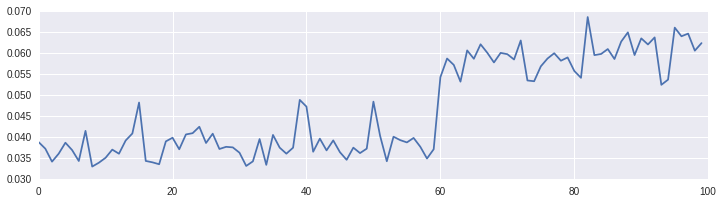

In [211]:
plt.plot(np.mean(np.abs(final_dense.W.get_value()), axis=1))

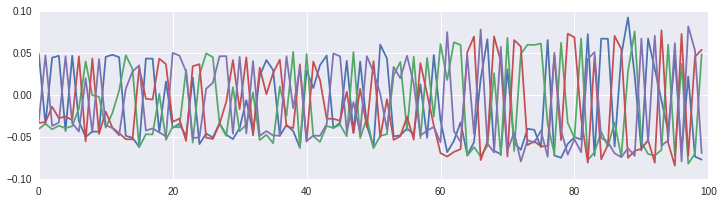

In [209]:
plt.plot(final_dense.W.get_value())

In [324]:
df_merged_bcic = load_data_frame('data/models/paper/bci-competition/epo/merged//', shorten_headers=False)

dataset_averaged_frame(remove_columns_with_same_value(df_merged_bcic))

time  \
                                                                          len   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold        
False                   identity            0          400                  9   
                                            4          400                  9   
True                    elu                 0          400                  9   
                                                       800                  9   
                                            4          400                  9   
                                                       800                  9   

                                                                                   \
                                                                            tmean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold            
False                   identity            0          400               00:06:14   
                                            4          400               00:06:11   
True                    elu                 0          400               00:07:17   
                                                       800               00:09:10   
                                            4          400               00:05:14   
                                                       800               00:06:49   

                                                                                   \
                                                                             tstd   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold            
False                   identity            0          400               00:01:54   
                                            4          400               00:01:11   
True                    elu                 0          400               00:03:24   
                                                       800               00:03:46   
                                            4          400               00:01:14   
                                                       800               00:01:43   

                                                                          test  \
                                                                          mean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold         
False                   identity            0          400                62.9   
                                            4          400                55.7   
True                    elu                 0          400                64.9   
                                                       800                66.0   
                                            4          400                48.5   
                                                       800                48.7   

                                                                                \
                                                                           std   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold         
False                   identity            0          400                10.9   
                                            4          400                15.3   
True                    elu                 0          400                13.0   
                                                       800                14.5   
                                            4          400                 9.0   
                                                       800                 7.5   

                                                                          train  \
                                                                           mean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold          
False                   identity            0          400                100.0   
 

In [325]:

df_merged_ours = load_data_frame('data/models/paper/ours/epo/merged//', shorten_headers=False)

dataset_averaged_frame(remove_columns_with_same_value(df_merged_ours))

time  \
                                                                          len   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold        
False                   identity            0          400                 20   
                                            4          400                 20   
True                    elu                 0          400                 20   
                                                       800                 20   
                                            4          400                 20   
                                                       800                 20   

                                                                                   \
                                                                            tmean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold            
False                   identity            0          400               00:25:21   
                                            4          400               00:28:06   
True                    elu                 0          400               00:27:35   
                                                       800               00:29:57   
                                            4          400               00:35:30   
                                                       800               00:37:29   

                                                                                   \
                                                                             tstd   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold            
False                   identity            0          400               00:07:24   
                                            4          400               00:08:40   
True                    elu                 0          400               00:08:31   
                                                       800               00:14:37   
                                            4          400               00:17:25   
                                                       800               00:19:13   

                                                                          test  \
                                                                          mean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold         
False                   identity            0          400                88.1   
                                            4          400                82.8   
True                    elu                 0          400                91.4   
                                                       800                90.2   
                                            4          400                78.3   
                                                       800                77.7   

                                                                                \
                                                                           std   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold         
False                   identity            0          400                 5.8   
                                            4          400                11.9   
True                    elu                 0          400                 4.5   
                                                       800                 5.6   
                                            4          400                15.0   
                                                       800                17.1   

                                                                          train  \
                                                                           mean   
batch_norm_before_merge nonlin_before_merge low_cut_hz max_abs_threshold          
False                   identity            0          400                100.0   
 

In [137]:
dataset_averaged_frame(all_df[((all_df.freq == '>0') | (all_df.freq == '>4')) & (all_df.clean == False)])

time  \
                                                                     len   
clean dataset freq max_abs_threshold net     train_type trial_start        
False bcic    >0   800               csp     epo         500           9   
                                     deep5   cnt        -500           9   
                                             epo        -500           9   
                                     shallow cnt        -500           9   
                                             epo        -500           9   
              >4   800               csp     epo         500           9   
                                     deep5   cnt        -500           9   
                                             epo        -500           9   
                                     shallow cnt        -500           9   
                                             epo        -500           9   
      ours    >0   800               csp     epo         500          20   
                                     deep5   cnt        -500          20   
                                             epo        -500          20   
                                     shallow cnt        -500          20   
                                             epo        -500          20   
              >4   800               csp     epo         500          20   
                                     deep5   cnt        -500          20   
                                             epo        -500          20   
                                     shallow cnt        -500          20   
                                             epo        -500          20   

                                                                              \
                                                                       tmean   
clean dataset freq max_abs_threshold net     train_type trial_start            
False bcic    >0   800               csp     epo         500        00:00:48   
                                     deep5   cnt        -500        00:29:07   
                                             epo        -500        00:06:53   
                                     shallow cnt        -500        00:15:31   
                                             epo        -500        00:06:05   
              >4   800               csp     epo         500        00:00:39   
                                     deep5   cnt        -500        00:27:06   
                                             epo        -500        00:06:43   
                                     shallow cnt        -500        00:17:18   
                                             epo        -500        00:05:14   
      ours    >0   800               csp     epo         500        00:09:07   
                                     deep5   cnt        -500        00:57:42   
                                             epo        -500        00:23:35   
                                     shallow cnt        -500        00:33:04   
                                             epo        -500        00:17:23   
              >4   800               csp     epo         500        00:08:33   
                                     deep5   cnt        -500        00:54:38   
                                             epo        -500        00:25:55   
                                     shallow cnt        -500        00:39:26   
                                             epo        -500        00:22:12   

                                                                              \
                                                                        tstd   
clean dataset freq max_abs_threshold net     train_type trial_start            
False bcic    >0   800               csp     epo         500        00:00:01   
                                     deep5   cnt        -500        00:13:20   
                                             epo        -500        00:02:13  

## New with Pandas

In [3]:
from braindecode.analysis.stats import perm_mean_diff_test
import pandas as pd
from braindecode.analysis.pandas_util import round_numeric_columns
from braindecode.analysis.stats import wilcoxon_signed_rank, sign_test


from braindecode.analysis.pandas_util import restrict, restrict_or_unset, restrict_or_missing_col
from braindecode.paper.results import * 

## > 8 Hz comparison

In [366]:

df_csp_ours = load_data_frame('data/models/paper/ours/csp/', shorten_headers=False)

In [367]:
df_csp_ours_for_comp = df_csp_ours[(df_csp_ours.high_width == 8) & 
                                   (df_csp_ours.max_abs_threshold == 800) &
                                  (df_csp_ours.trial_start == 500)]
dataset_averaged_frame(remove_columns_with_same_value(clean_datasets(df_csp_ours_for_comp)))

time                    test       train     
                                 len    tmean     tstd  mean   std  mean  std
last_low_freq min_freq max_freq                                              
10            1        118        14 00:08:42 00:01:41  91.2   9.5  98.7  1.5
              7        118        14 00:08:20 00:01:36  90.9   9.9  98.4  1.9
14            11       26         14 00:02:06 00:00:20  81.2  11.7  94.7  4.5
                       118        14 00:15:50 00:03:13  90.2  10.7  98.3  2.1

In [368]:
df_csp_ours_for_comp = df_csp_ours[(df_csp_ours.high_width == 22)]
dataset_averaged_frame(remove_columns_with_same_value(df_csp_ours_for_comp))

time                    test       train      
   len    tmean     tstd  mean   std  mean   std
0   20 00:01:16 00:00:10  71.4  16.1  83.5  10.9

In [369]:

df_csp_bcic = load_data_frame('data/models/paper/bci-competition/csp/', shorten_headers=False)

In [372]:
df_csp_bcic_for_comp = df_csp_bcic[(df_csp_bcic.resample_fs == 250) & 
                                  (df_csp_bcic.trial_start == 500)]
dataset_averaged_frame(remove_columns_with_same_value(clean_datasets(df_csp_bcic_for_comp)))

time  \
                                                                                                              len   
trial_stop high_width last_low_freq high_overlap n_selected_features low_width min_freq max_freq low_overlap        
2500       8          10            4            20                  6         7        34       3              9   
4000       8          10            4            20                  6         1        34       3              9   
                                                                               7        34       3              9   
                      14            4            20                  6         11       26       3              9   
                                                                                        34       3              9   
           22         19            0            null                22        19       19       0              9   

                                                                                                                       \
                                                                                                                tmean   
trial_stop high_width last_low_freq high_overlap n_selected_features low_width min_freq max_freq low_overlap            
2500       8          10            4            20                  6         7        34       3           00:00:33   
4000       8          10            4            20                  6         1        34       3           00:00:48   
                                                                               7        34       3           00:00:39   
                      14            4            20                  6         11       26       3           00:00:24   
                                                                                        34       3           00:00:53   
           22         19            0            null                22        19       19       0           00:00:06   

                                                                                                                       \
                                                                                                                 tstd   
trial_stop high_width last_low_freq high_overlap n_selected_features low_width min_freq max_freq low_overlap            
2500       8          10            4            20                  6         7        34       3           00:00:01   
4000       8          10            4            20                  6         1        34       3           00:00:01   
                                                                               7        34       3           00:00:01   
                      14            4            20                  6         11       26       3           00:00:00   
                                                                                        34       3           00:00:08   
           22         19            0            null                22        19       19       0           00:00:00   

                                                                                                              test  \
                                                                                                              mean   
trial_stop high_width last_low_freq high_overlap n_selected_features low_width min_freq max_freq low_overlap         
2500       8          10            4            20                  6         7        34       3            67.6   
4000       8          10            4            20                  6         1        34       3            68.0   
                                                                               7        34       3            67.8   
                      14            4            20                  6         11       26       3            66.7   
                                                 

In [4]:
from braindecode.analysis.pandas_util import (load_data_frame,
                                              dataset_averaged_frame,
                                              remove_columns_with_same_value,
                                              remove_indices_with_same_value)

df_csp_ours = load_data_frame('data/models/paper/ours/csp/', shorten_headers=False)
df_csp_bcic = load_data_frame('data/models/paper/bci-competition/csp/', shorten_headers=False)
df_deep_cnt_ours = load_data_frame('data/models/paper/ours/cnt/deep4/', shorten_headers=False)
df_deep_cnt_bcic = load_data_frame('data/models/paper/bci-competition/cnt/deep4/', shorten_headers=False)
df_shallow_cnt_ours = load_data_frame('data/models/paper/ours/cnt/shallow//', shorten_headers=False)
df_shallow_cnt_bcic = load_data_frame('data/models/paper/bci-competition/cnt/shallow//', shorten_headers=False)

df_deep_epo_ours = load_data_frame('data/models/paper/ours/epo/deep4/', shorten_headers=False)
df_deep_epo_bcic = load_data_frame('data/models/paper/bci-competition/epo/deep4/', shorten_headers=False)
df_shallow_epo_ours = load_data_frame('data/models/paper/ours/epo/shallow//', shorten_headers=False)
df_shallow_epo_bcic = load_data_frame('data/models/paper/bci-competition/epo/shallow//', shorten_headers=False)

In [5]:
df_merged_cnt_bcic = load_data_frame('data/models/paper/bci-competition//cnt/merged//', shorten_headers=False)
df_merged_epo_bcic = load_data_frame('data/models/paper/bci-competition//epo/merged//', shorten_headers=False)
df_merged_cnt_ours = load_data_frame('data/models/paper/ours/cnt/merged//', shorten_headers=False)
df_merged_epo_ours = load_data_frame('data/models/paper/ours/epo/merged//', shorten_headers=False)

In [6]:
from braindecode.paper.results import clean_datasets
def add_p_vals_to_df_row(df, test_a, test_b, n_diffs_for_large=2**20):
    assert len(test_a) == len(test_b)
    if len(test_a) > 20:
        assert len(test_a) == 29 or len(test_a) == 23
        p_val = perm_mean_diff_test(test_a,test_b, n_diffs=n_diffs_for_large)
    else:
        assert len(test_a) == 9 or len(test_a) == 20 or len(test_a) == 14 
        p_val = perm_mean_diff_test(test_a,test_b)
    p_val_wilc = wilcoxon_signed_rank(test_a, test_b)
    p_val_sign = sign_test(test_a, test_b)
    df['rand'] = p_val
    df['wilc'] = p_val_wilc
    df['sign'] = p_val_sign    

## Validation CSP

In [7]:
def csp_no_standardize(df):
    df = df[((df.standardize_filt_cnt == False) | (df.standardize_filt_cnt == '-')) &
           ((df.standardize_epo == False) | (df.standardize_epo == '-')) &
           ((df.standardize_cnt == False) | (df.standardize_cnt == '-')) &
           ((df.standardize == False) | (df.standardize == '-'))]
    return df

def csp_no_standardize_new(df):
    df = csp_no_standardize(df)
    df = df[df.standardize == '-']
    return df

In [8]:
df_valid = df_csp_bcic.copy()
df_valid = df_valid[(df_valid.resample_fs == 250) & (df_valid.max_freq == 34) & (df_valid.min_freq == 7)]
df_valid = df_valid[df_valid.low_bound == 0]
df_valid = df_valid.sort_values(by='dataset_filename')

dataset_averaged_frame(remove_columns_with_same_value(df_valid))

time                    test       train     
                        len    tmean     tstd  mean   std  mean  std
trial_stop trial_start                                              
2500        500           9 00:00:33 00:00:01  67.6  15.1  93.6  4.1
4000       -500           9 00:00:44 00:00:01  57.1  10.3  88.9  6.6
            0             9 00:00:41 00:00:01  61.3  14.3  90.3  6.2
            500           9 00:00:39 00:00:01  67.8  15.9  92.6  5.2

In [9]:
test_val_theirs = [79.16,52.08,83.33,62.15,54.51,39.24,83.33,82.64,66.67]

test_val_ours_2500 = df_valid[df_valid.trial_stop == 2500].test

df = pd.DataFrame()
df['test_theirs'] = [np.mean(test_val_theirs)]
df['test_ours'] = [np.mean(test_val_ours_2500)]
df['diff'] = [np.mean(test_val_ours_2500) - np.mean(test_val_theirs)]
df = round_numeric_columns(df, 2)
add_p_vals_to_df_row(df, test_val_theirs, test_val_ours_2500)
df

,test_theirs,test_ours,diff,rand,wilc,sign
0,67.01,67.59,0.58,0.78125,0.734375,1


In [10]:
test_val_ours_4000 = df_valid[(df_valid.trial_stop == 4000) & (df_valid.trial_start == 500)].test

df = pd.DataFrame()
df['test_theirs'] = [np.mean(test_val_theirs)]
df['test_ours'] = [np.mean(test_val_ours_4000)]
df['diff'] = [np.mean(test_val_ours_4000) - np.mean(test_val_theirs)]
df = round_numeric_columns(df, 2)
add_p_vals_to_df_row(df, test_val_theirs, test_val_ours_4000)
df

,test_theirs,test_ours,diff,rand,wilc,sign
0,67.01,67.82,0.81,0.757812,0.734375,1


## Main comparison

In [11]:
from braindecode.analysis.pandas_util import restrict_if_existing_and_not_unique

In [41]:
from braindecode.paper.results import *
all_df = pd.DataFrame()
for dataset in ('bcic', 'ours'):
    for net in ('shallow', 'deep5', 'merged'):
        for training in 'epo', 'cnt':
            for band in ['>0', '>4', ]:
                for clean in (True, False):
                    for trial_start in (-500, ):#0,500
                        for max_abs_val_threshold in (800,):#400,
                            if max_abs_val_threshold == 400 and trial_start != -500:
                                continue
                            if training == 'cnt':
                                trial_start_net = trial_start + 2000
                            else:
                                trial_start_net = trial_start
                            if dataset == 'bcic':
                                dfc = df_csp_bcic
                            else:
                                assert dataset == 'ours'
                                dfc = df_csp_ours
                            if dataset == 'bcic' and net == 'shallow' and training == 'cnt':
                                dfn = df_shallow_cnt_bcic
                            elif dataset == 'bcic' and net == 'shallow' and training == 'epo':
                                dfn = df_shallow_epo_bcic
                            elif dataset == 'bcic' and net == 'deep5' and training == 'cnt':
                                dfn = df_deep_cnt_bcic
                            elif dataset == 'bcic' and net == 'deep5' and training == 'epo':
                                dfn = df_deep_epo_bcic
                            elif dataset == 'bcic' and net == 'merged' and training == 'cnt':
                                dfn = df_merged_cnt_bcic
                            elif dataset == 'bcic' and net == 'merged' and training == 'epo':
                                dfn = df_merged_epo_bcic
                            elif dataset == 'ours' and net == 'shallow' and training == 'cnt':
                                dfn = df_shallow_cnt_ours
                            elif dataset == 'ours' and net == 'shallow' and training == 'epo':
                                dfn = df_shallow_epo_ours
                            elif dataset == 'ours' and net == 'deep5' and training == 'cnt':
                                dfn = df_deep_cnt_ours
                            elif dataset == 'ours' and net == 'deep5' and training == 'epo':
                                dfn = df_deep_epo_ours
                            elif dataset == 'ours' and net == 'merged' and training == 'cnt':
                                dfn = df_merged_cnt_ours
                            elif dataset == 'ours' and net == 'merged' and training == 'epo':
                                dfn = df_merged_epo_ours
                            else:
                                raise ValueError("Unknown combination {:s} {:s} {:s}".format(
                                    dataset, net, training))
                            if clean:
                                dfn = clean_datasets(dfn)
                                dfc = clean_datasets(dfc)

                            if band == '>0':
                                this_dfn = above_0(dfn)
                                this_dfc = csp_above_0(dfc)
                            elif band == '>4':
                                this_dfn = above_4(dfn)
                                this_dfc = csp_above_4(dfc)
                            elif band == '0-4':
                                this_dfn = from_0_to_4(dfn)
                                this_dfc = csp_0_to_4(dfc)


                            if net == 'deep5' and training == 'epo':
                                this_dfn = deep5_main_comp(this_dfn)
                            elif net == 'deep5' and training == 'cnt':
                                this_dfn = deep5_cnt_main_comp(this_dfn)
                            elif net =='shallow' and training == 'epo':
                                this_dfn = shallow_main_comp(this_dfn)
                            elif net =='shallow' and training == 'cnt':
                                this_dfn = shallow_cnt_main_comp(this_dfn)
                            elif net == 'merged':
                                this_dfn = merged_main_comp(this_dfn)
                            else:
                                raise ValueError("Unknown combination")


                            this_dfc = main_comp_csp(this_dfc)
                            this_dfn = this_dfn[this_dfn.max_abs_threshold == max_abs_val_threshold]
                            if dataset == 'ours':
                                this_dfc = this_dfc[this_dfc.max_abs_threshold == max_abs_val_threshold]
                                
                            this_dfn = this_dfn[this_dfn.trial_start == trial_start_net]
                            trial_start_csp = 500 # hack to not have to cahnge logic of loop
                            this_dfc = this_dfc[this_dfc.trial_start == trial_start_csp]
                            this_dfn = restrict_if_existing_and_not_unique(this_dfn, variant='b')
                            if training == 'epo':
                                this_dfn = this_dfn[this_dfn.max_increasing_epochs == 160]
                                this_dfn = restrict_if_existing_and_not_unique(this_dfn, monitors='trial_monitors')
                            else:
                                assert training == 'cnt'
                                this_dfn = this_dfn[this_dfn.max_increasing_epochs == 80]

                            if dataset == 'bcic' and net == 'deep5' and (
                                training == 'epo' or (band == '>0' or band == '>4')):
                                this_dfn = this_dfn[this_dfn.layers == 'deep_5']


                            if dataset == 'bcic':
                                assert len(this_dfc) == 9, "wrong length: {:d} ({:s})".format(
                                    len(this_dfc), str((dataset, net, training, band, clean)))
                                assert len(this_dfn) == 9, "wrong length: {:d} ({:s})".format(
                                    len(this_dfn), str((dataset, net, training, band, clean)))
                            elif dataset == 'ours' and clean:
                                assert len(this_dfc) == 14, "wrong length: {:d} ({:s})".format(
                                    len(this_dfc), str((dataset, net, training, band, clean)))
                                assert len(this_dfn) == 14, "wrong length: {:d} ({:s})".format(
                                    len(this_dfn), str((dataset, net, training, band, clean)))
                            elif dataset == 'ours' and (not clean):
                                assert len(this_dfc) == 20, "wrong length: {:d} ({:s})".format(
                                    len(this_dfc), str((dataset, net, training, band, clean)))
                                assert len(this_dfn) == 20, "wrong length: {:d} ({:s})".format(
                                    len(this_dfn), str((dataset, net, training, band, clean)))
                            else:
                                raise ValueError("Unknown combination")


                            this_dfn = remove_columns_with_same_value(this_dfn)
                            this_dfn['clean'] = clean
                            this_dfn['net'] = net
                            this_dfn['train_type'] = training
                            this_dfn['freq'] = band
                            this_dfn['dataset'] = dataset
                            this_dfn['trial_start'] = trial_start
                            this_dfn['max_abs_threshold'] = max_abs_val_threshold

                            all_df = all_df.append(this_dfn)
                            if net == 'shallow' and training == 'epo': # only add csp once, not several times => for both nets :))
                                this_dfc = remove_columns_with_same_value(this_dfc)
                                this_dfc['clean'] = clean
                                this_dfc['net'] = 'csp'
                                this_dfc['freq'] = band
                                this_dfc['train_type'] = training
                                this_dfc['dataset'] = dataset
                                this_dfc['trial_start'] = trial_start_csp
                                this_dfc['max_abs_threshold'] = max_abs_val_threshold
                                all_df = all_df.append(this_dfc)

In [43]:

assert len(all_df) == ((3*2*2 + 2) * 29 + (3*2*2 + 2) * 23)

## Stricter trial cleaning with max abs 400

In [45]:
all_400_max_df = pd.DataFrame()
for clean in (False, True):
        trial_start = -500
        max_abs_threshold = 400


        all_labels = []
        sig_count_strong = []
        sig_count_weak = []
        for dataset in ('bcic', 'ours', 'combined'):
            for freq in ('0-4', '>0', '>4'):
                for net in ('deep5', 'shallow'):
                    for train_type in ('cnt', 'epo',):
                        log.info("{:s} {:s} {:s} {:s} (clean: {:s})".format(
                                dataset, freq,net, train_type, str(clean)))
                        this_row_net = all_df[(all_df.freq == freq) &
                                               (all_df.train_type == train_type) &
                                               (all_df.net == net) &
                                                (all_df.clean == clean) &
                                         (all_df.trial_start == trial_start) &
                                             (all_df.max_abs_threshold == max_abs_threshold)]
                        this_row_csp = all_df[(all_df.freq == freq) &
                                               (all_df.net == 'csp') &
                                                (all_df.clean == clean) &
                                         (all_df.trial_start == 500) &
                                             (all_df.max_abs_threshold == max_abs_threshold)]
                        if dataset != 'combined':
                            this_row_csp = this_row_csp[this_row_csp.dataset == dataset]
                            this_row_net = this_row_net[this_row_net.dataset == dataset]
                        df_compare = compare_net_csp(this_row_net,this_row_csp, net,freq,dataset,
                                                    max_n_p_vals=17, with_csp_acc=True)
                        df_compare['clean'] = clean
                        df_compare['train_type'] = train_type
                        all_400_max_df = all_400_max_df.append(df_compare)

INFO:root:bcic 0-4 deep5 cnt (clean: False)


TypeError: unbound method cython_function_or_method object must be called with Timedelta instance as first argument (got NaTType instance instead)

AttributeError: 'DataFrame' object has no attribute 'dataset'

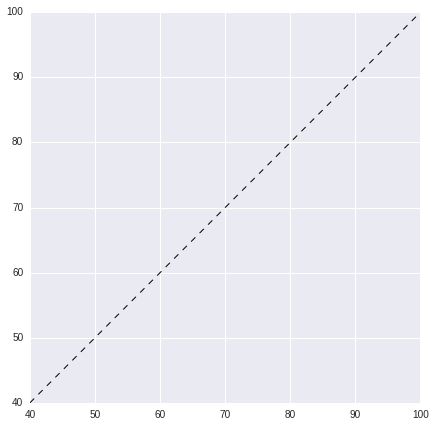

In [46]:
%config InlineBackend.figure_format = 'png' 

for clean in (False, True):
        trial_start = -500
        max_abs_threshold = 400
        fig = plt.figure(figsize=(7,7))

        plt.plot([40,100], [40,100], color='black', label='', linestyle='--', lw=1)

        all_labels = []
        sig_count_strong = []
        sig_count_weak = []
        for dataset in ('bcic', 'ours', 'combined'):
            for freq in ('0-4', '>0', '>4'):
                for net in ('deep5', 'shallow'):
                    for train_type in ('cnt', 'epo',):
                        this_row = all_400_max_df[
                            (all_400_max_df.dataset == dataset) &
                            (all_400_max_df.freq == freq) &
                            (all_400_max_df.name == net) &
                            (all_400_max_df.train_type == train_type) &
                            (all_400_max_df.clean == clean)]
                        this_row = this_row.iloc[0]
                        if net == 'deep5':
                            marker = 'o'
                        else:
                            assert net == 'shallow'
                            marker = '^'
                        if '>0' == freq:
                            color = seaborn.color_palette()[0]
                        elif '>4' == freq:
                            color = seaborn.color_palette()[1]
                        else:
                            assert freq == '0-4'
                            color = seaborn.color_palette()[3]
                        markerfacecolor = 'None'
                        if 'bcic' == dataset:
                            markersize=7
                        elif 'ours' == dataset:
                            markersize=10
                        elif 'combined' == dataset:
                            markersize=13 

                        markerfacecolor = 'None'
                        markeredgecolor = color
                        if 'cnt' == train_type:
                            markerfacecolor = color + (0.75,) # some alpha
                            markeredgecolor = 'black'

                        test_csp = this_row.test_csp
                        test_net = this_row.test_net


                        plt.plot(test_csp, test_net, color=color, 
                                 marker=marker, linestyle='None', markersize=markersize, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)
                        # add significance star
                        if this_row['rand'] < 0.05:
                            if this_row['rand'] < 0.001:
                                signicance_str = '***'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))
                            elif this_row['rand'] < 0.01:
                                signicance_str = '**'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))

                            else:
                                signicance_str = '*'
                                sig_count_weak.append(int(np.sign(test_net - test_csp)))
                            plt.annotate(
                                signicance_str, xy = (test_csp, test_net), xytext = (10, -4), fontsize=16,
                                textcoords = 'offset points', ha = 'left', va = 'center',)




        plt.xlabel('FBCSP Accuracy [%]', fontsize=18)

        plt.ylabel('ConvNet Accuracy [%]', fontsize=18)

        circle = plt.Circle((83,83), 5, facecolor='None', linestyle='dotted', linewidth=1)
        plt.gca().add_artist(circle)


        ax = plt.gca()
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[12:30], (
                                   'Deep 0-4 Hz (cropped)', 
                                   'Deep 0-4 Hz (trial)',
                                   'Shallow 0-4 Hz (cropped)',
                                   'Shallow 0-4 Hz (trial)',
                                   'Deep 0-125 Hz (cropped)', 
                                   'Deep 0-125 Hz (trial)',
                                   'Shallow 0-125 Hz (cropped)',
                                   'Shallow 0-125 Hz (trial)',
                                   'Deep 4-125 Hz (cropped)', 
                                   'Deep 4-125 Hz (trial)',
                                   'Shallow 4-125 Hz (cropped)',
                                   'Shallow 4-125 Hz (trial)',),
                  bbox_to_anchor=(1.55,1),fontsize=14)

        plt.tight_layout()
        plt.annotate(u"$N_{{ConvNet>FBCSP}}$ = {:d}".format(np.sum(np.array(sig_count_strong) == 1)
                                                    + np.sum(np.array(sig_count_weak) == 1)),xy=(42,96),
                    fontsize=22)
        plt.annotate(u"$N_{{ConvNet<FBCSP}}$ = {:d}".format(np.sum(np.array(sig_count_strong) == -1)
                                                    + np.sum(np.array(sig_count_weak) == -1)),xy=(98,44),
                    fontsize=22, ha='right')

        # We change the fontsize of minor ticks label 
        plt.gca().tick_params(axis='both', which='major', labelsize=18)
        clean_str = 'Restricted subjects' if clean else 'All subjects'
        plt.title('{:s} Max Abs 400'.format(clean_str), fontsize=16)


### remove max abs threshold == 400

In [47]:
all_df = all_df[all_df.max_abs_threshold == 800]

### Plot overall stuff

##### Make comparisons

In [48]:
# lets reduce to proper comparison
#all_df = all_df[((all_df.net != 'csp') & (all_df.trial_start == -500)) |
#      ((all_df.net == 'csp') & (all_df.trial_start == 500))]

In [50]:

all_compared = pd.DataFrame()
param_keys = ['dataset', 'freq', 'net',  'train_type', 'clean']
all_groups = all_df.groupby(param_keys)

for name, group in all_groups:
    assert len(group['freq'].unique()) == 1
    freq = group['freq'].iloc[0]
    assert len(group['dataset'].unique()) == 1
    dataset = group['dataset'].iloc[0]
    assert len(group['net'].unique()) == 1
    net = group['net'].iloc[0]
    assert len(group['clean'].unique()) == 1
    clean = group['clean'].iloc[0]
    assert len(group['train_type'].unique()) == 1
    train_type = group['train_type'].iloc[0]
    if net == 'csp': continue
    #if net != 'merged': continue
    if group.max_abs_threshold.iloc[0] == 400: continue
    csp = all_df[(all_df.net == 'csp') & (all_df.freq == freq) &
                (all_df.dataset == dataset) &
                (all_df.clean == clean)]
    df_compare = compare_net_csp(group, csp, net, freq, dataset, with_csp_acc=True, with_std=True,
                                with_std_error=True)   
    df_compare['clean'] = clean
    df_compare['train_type'] = train_type
    all_compared = all_compared.append(df_compare)
    log.info("{:s} {:s} {:s} {:s}".format(dataset, freq,net, str(clean)))

INFO:root:bcic >0 deep5 False
INFO:root:bcic >0 deep5 True
INFO:root:bcic >0 deep5 False
INFO:root:bcic >0 deep5 True
INFO:root:bcic >0 merged False
INFO:root:bcic >0 merged True
INFO:root:bcic >0 merged False
INFO:root:bcic >0 merged True
INFO:root:bcic >0 shallow False
INFO:root:bcic >0 shallow True
INFO:root:bcic >0 shallow False
INFO:root:bcic >0 shallow True
INFO:root:bcic >4 deep5 False
INFO:root:bcic >4 deep5 True
INFO:root:bcic >4 deep5 False
INFO:root:bcic >4 deep5 True
INFO:root:bcic >4 merged False
INFO:root:bcic >4 merged True
INFO:root:bcic >4 merged False
INFO:root:bcic >4 merged True
INFO:root:bcic >4 shallow False
INFO:root:bcic >4 shallow True
INFO:root:bcic >4 shallow False
INFO:root:bcic >4 shallow True
INFO:root:ours >0 deep5 False
INFO:root:ours >0 deep5 True
INFO:root:ours >0 deep5 False
INFO:root:ours >0 deep5 True
INFO:root:ours >0 merged False
INFO:root:ours >0 merged True
INFO:root:ours >0 merged False
INFO:root:ours >0 merged True
INFO:root:ours >0 shallow Fa

##### Add combined set comparisons

##### look at jitter plot

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


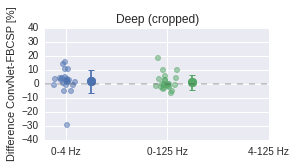

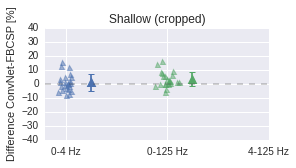

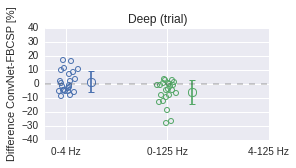

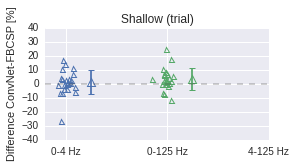

In [51]:
from numpy.random import RandomState

param_keys = ['freq', 'net',  'train_type', 'clean', 'max_abs_threshold']
all_groups = all_df.groupby(param_keys)

all_test_net = []
all_test_csp = []
rng = RandomState(394834)
for wanted_train_type in ('cnt', 'epo'):
    for wanted_net in ('deep5', 'shallow'):
        plt.figure(figsize=(4,2))
        
        offset = 0
        for name, group in all_groups:
            assert len(group['freq'].unique()) == 1
            freq = group['freq'].iloc[0]
            assert len(group['net'].unique()) == 1
            net = group['net'].iloc[0]
            assert len(group['clean'].unique()) == 1
            clean = group['clean'].iloc[0]
            assert len(group['train_type'].unique()) == 1
            train_type = group['train_type'].iloc[0]
            if clean == False: continue
            if net == 'csp': continue
            if net != wanted_net: continue
            if train_type != wanted_train_type: continue
            csp = all_df[(all_df.net == 'csp') & (all_df.freq == freq) &
                        (all_df.clean == clean)]
            assert (len(csp) == 29 and not clean) or (len(csp) == 23 and clean)
            df_merged = group.merge(csp, on='dataset_filename', suffixes=('_net','_csp'))

            test_acc_net = np.array(df_merged['test_net'])
            test_acc_csp = np.array(df_merged['test_csp'])
            all_test_net.append(test_acc_net)
            all_test_csp.append(test_acc_csp)
            diffs = test_acc_net - test_acc_csp
            if net == 'deep5':
                marker = 'o'
            else:
                assert net == 'shallow'
                marker = '^'
            if '>0' == freq:
                color = seaborn.color_palette()[0]
            elif '>4' == freq:
                color = seaborn.color_palette()[1]
            else:
                assert freq == '0-4'
                color = seaborn.color_palette()[3]
            markerfacecolor = 'None'
            if 'cnt' == train_type:
                markerfacecolor = color

            plt.plot(
                    rng.randn(len(diffs)) * 0.05 + offset,
                        diffs, color=color, marker=marker, alpha=0.5, linestyle='None',
                    markersize=5,markeredgecolor=color, markerfacecolor=markerfacecolor, 
                     markeredgewidth=1)
            plt.errorbar(offset+0.25, np.mean(diffs), yerr=np.std(diffs), ecolor=color,
                     marker=marker, linestyle='None',
                markersize=8,markeredgecolor=color, markerfacecolor=markerfacecolor, 
                             markeredgewidth=1)
            offset += 1
            #plt.xlabel('FBCSP Accuracy [%]')
        plt.ylabel('Difference ConvNet-FBCSP [%]')
        plt.ylim(-40,40)
        plt.axhline(y=0, linestyle='--', color=(0.3,0.3,0.3,0.3))
        plt.xticks(range(0,3), ['0-4 Hz', '0-125 Hz', '4-125 Hz'])
        title_str = wanted_net.strip('5').capitalize()
        if wanted_train_type == 'cnt':
            title_str += " (cropped)"
        else:
            assert wanted_train_type == 'epo'
            title_str += " (trial)"
        plt.title(title_str)


### Single Subject All Dots CSP vs Nets

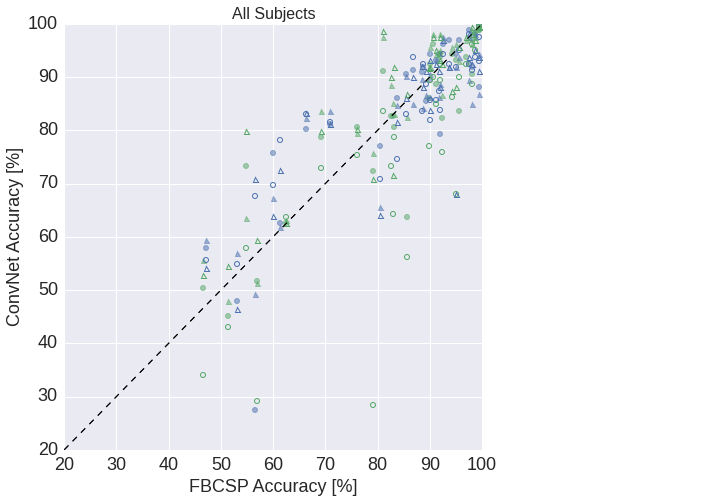

In [52]:
from numpy.random import RandomState

param_keys = ['freq', 'net',  'train_type', 'clean']
all_groups = all_df.groupby(param_keys)

all_test_net = []
all_test_csp = []
rng = RandomState(394834)
plt.figure(figsize=(7,7))
for wanted_train_type in ('cnt', 'epo'):
    for wanted_net in ('deep5', 'shallow'):
        
        offset = 0
        for name, group in all_groups:
            assert len(group['freq'].unique()) == 1
            freq = group['freq'].iloc[0]
            assert len(group['net'].unique()) == 1
            net = group['net'].iloc[0]
            assert len(group['clean'].unique()) == 1
            clean = group['clean'].iloc[0]
            assert len(group['train_type'].unique()) == 1
            train_type = group['train_type'].iloc[0]
            if clean == True: continue
            if net == 'csp': continue
            if net != wanted_net: continue
            if train_type != wanted_train_type: continue
            csp = all_df[(all_df.net == 'csp') & (all_df.freq == freq) &
                        (all_df.clean == clean)]
            assert (len(csp) == 29 and not clean) or (len(csp) == 23 and clean)
            df_merged = group.merge(csp, on='dataset_filename', suffixes=('_net','_csp'))

            test_acc_net = np.array(df_merged['test_net'])
            test_acc_csp = np.array(df_merged['test_csp'])
            all_test_net.append(test_acc_net)
            all_test_csp.append(test_acc_csp)
            diffs = test_acc_net - test_acc_csp
            if net == 'deep5':
                marker = 'o'
            else:
                assert net == 'shallow'
                marker = '^'
            if '>0' == freq:
                color = seaborn.color_palette()[0]
            elif '>4' == freq:
                color = seaborn.color_palette()[1]
            else:
                assert freq == '0-4'
                color = seaborn.color_palette()[3]
            markerfacecolor = 'None'
            if 'cnt' == train_type:
                markerfacecolor = color

            plt.plot(
                    test_acc_csp, test_acc_net, color=color, marker=marker, alpha=0.5, linestyle='None',
                    markersize=5,markeredgecolor=color, markerfacecolor=markerfacecolor, 
                     markeredgewidth=1)
            #plt.xlabel('FBCSP Accuracy [%]')


    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[12:30], (
                               'Deep 0-4 Hz (cropped)', 
                               'Deep 0-4 Hz (trial)',
                               'Shallow 0-4 Hz (cropped)',
                               'Shallow 0-4 Hz (trial)',
                               'Deep 0-125 Hz (cropped)', 
                               'Deep 0-125 Hz (trial)',
                               'Shallow 0-125 Hz (cropped)',
                               'Shallow 0-125 Hz (trial)',
                               'Deep 4-125 Hz (cropped)', 
                               'Deep 4-125 Hz (trial)',
                               'Shallow 4-125 Hz (cropped)',
                               'Shallow 4-125 Hz (trial)',),
              bbox_to_anchor=(1.55,1),fontsize=14)

    plt.tight_layout()
    plt.xlabel('FBCSP Accuracy [%]', fontsize=18)

    plt.ylabel('ConvNet Accuracy [%]', fontsize=18)

    # We change the fontsize of minor ticks label 
    plt.gca().tick_params(axis='both', which='major', labelsize=18)
    plt.title('All Subjects', fontsize=16)
    plt.plot([20,100], [20,100], color='black', label='', linestyle='--', lw=1)

### add combined set comparison

In [53]:

param_keys = ['freq', 'net',  'train_type', 'clean']
all_groups = all_df.groupby(param_keys)

for name, group in all_groups:
    assert len(group['freq'].unique()) == 1
    freq = group['freq'].iloc[0]
    assert len(group['net'].unique()) == 1
    net = group['net'].iloc[0]
    assert len(group['clean'].unique()) == 1
    clean = group['clean'].iloc[0]
    assert len(group['train_type'].unique()) == 1
    train_type = group['train_type'].iloc[0]
    if net == 'csp': continue
    #if net != 'merged': continue
    log.info("{:s} {:s} {:s} (clean: {:s})".format(freq,net, train_type, str(clean)))
    csp = all_df[(all_df.net == 'csp') & (all_df.freq == freq) &
                (all_df.clean == clean)]
    assert (len(csp) == 29 and not clean) or (len(csp) == 23 and clean)
    df_compare = compare_net_csp(group, csp, net, freq, 'combined', with_csp_acc=True, with_std=True,
                                with_std_error=True)
    df_compare['clean'] = clean
    df_compare['train_type'] = train_type
    all_compared = all_compared.append(df_compare)

INFO:root:>0 deep5 cnt (clean: False)
INFO:root:>0 deep5 cnt (clean: True)
INFO:root:>0 deep5 epo (clean: False)
INFO:root:>0 deep5 epo (clean: True)
INFO:root:>0 merged cnt (clean: False)
INFO:root:>0 merged cnt (clean: True)
INFO:root:>0 merged epo (clean: False)
INFO:root:>0 merged epo (clean: True)
INFO:root:>0 shallow cnt (clean: False)
INFO:root:>0 shallow cnt (clean: True)
INFO:root:>0 shallow epo (clean: False)
INFO:root:>0 shallow epo (clean: True)
INFO:root:>4 deep5 cnt (clean: False)
INFO:root:>4 deep5 cnt (clean: True)
INFO:root:>4 deep5 epo (clean: False)
INFO:root:>4 deep5 epo (clean: True)
INFO:root:>4 merged cnt (clean: False)
INFO:root:>4 merged cnt (clean: True)
INFO:root:>4 merged epo (clean: False)
INFO:root:>4 merged epo (clean: True)
INFO:root:>4 shallow cnt (clean: False)
INFO:root:>4 shallow cnt (clean: True)
INFO:root:>4 shallow epo (clean: False)
INFO:root:>4 shallow epo (clean: True)


In [54]:
all_compared[(all_compared.dataset == 'combined') & 
             (all_compared.clean ==False) & (all_compared.freq != '0-4')].sort_values(by='rand')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,merged,>4,combined,83.6,68.7,-14.9,14.7,2.7,9.536743e-07,7.078052e-08,1.117587e-07,00:27:58,False,epo
0,deep5,>4,combined,83.6,75.0,-8.6,12.0,2.2,3.528595e-05,9.822473e-05,8.130059e-03,00:19:57,False,epo
0,shallow,>4,combined,83.6,85.9,2.2,5.3,1.0,3.194046e-02,5.622556e-02,2.411954e-02,00:32:34,False,cnt
0,shallow,>4,combined,83.6,86.2,2.6,7.1,1.3,6.311798e-02,2.906404e-02,5.461127e-04,00:16:56,False,epo
0,merged,>0,combined,84.2,82.7,-1.5,6.7,1.2,2.634897e-01,1.055598e-01,6.142835e-02,00:23:30,False,epo
0,deep5,>4,combined,83.6,82.7,-1.0,7.3,1.3,4.941025e-01,3.041932e-01,4.582583e-01,00:46:05,False,cnt
0,merged,>4,combined,83.6,82.9,-0.7,6.2,1.1,5.332775e-01,5.792817e-01,1.000000e+00,00:54:15,False,cnt
0,shallow,>0,combined,84.2,83.4,-0.8,7.1,1.3,5.656900e-01,3.926539e-01,7.110711e-01,00:27:37,False,cnt
0,merged,>0,combined,84.2,84.6,0.5,6.0,1.1,6.811209e-01,9.660341e-01,7.110711e-01,00:52:21,False,cnt
0,deep5,>0,combined,84.2,84.5,0.3,8.4,1.6,8.415327e-01,4.169197e-01,2.649309e-01,00:48:49,False,cnt


In [55]:
all_compared[(all_compared.dataset == 'combined') & 
             (all_compared.clean ==False) & (all_compared.freq != '0-4') &
            (all_compared.name == 'merged')].sort_values(by='rand')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,merged,>4,combined,83.6,68.7,-14.9,14.7,2.7,9.536743e-07,7.078052e-08,1.117587e-07,00:27:58,False,epo
0,merged,>0,combined,84.2,82.7,-1.5,6.7,1.2,2.634897e-01,1.055598e-01,6.142835e-02,00:23:30,False,epo
0,merged,>4,combined,83.6,82.9,-0.7,6.2,1.1,5.332775e-01,5.792817e-01,1.000000e+00,00:54:15,False,cnt
0,merged,>0,combined,84.2,84.6,0.5,6.0,1.1,6.811209e-01,9.660341e-01,7.110711e-01,00:52:21,False,cnt


In [56]:
all_compared[(all_compared.dataset == 'combined') & 
             (all_compared.clean ==True) & (all_compared.freq != '0-4') &
            (all_compared.name == 'merged')].sort_values(by='rand')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,merged,>4,combined,81.9,68.1,-13.8,15.4,3.2,0.000006,0.000005,0.000006,00:26:35,True,epo
0,merged,>0,combined,82.1,83.8,1.8,5.6,1.2,0.160913,0.427418,1.000000,00:46:19,True,cnt
0,merged,>0,combined,82.1,81.4,-0.6,7.2,1.5,0.678124,0.410040,0.210040,00:21:28,True,epo
0,merged,>4,combined,81.9,82.1,0.3,6.0,1.2,0.830881,0.799773,0.677639,00:48:40,True,cnt


In [57]:
all_compared[(all_compared.dataset == 'combined') & 
             (all_compared.clean ==True) & (all_compared.freq != '0-4')].sort_values(by='rand')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,merged,>4,combined,81.9,68.1,-13.8,15.4,3.2,0.000006,0.000005,0.000006,00:26:35,True,epo
0,deep5,>4,combined,81.9,76.0,-5.9,8.7,1.8,0.001698,0.003874,0.093140,00:18:44,True,epo
0,shallow,>4,combined,81.9,85.2,3.4,5.2,1.1,0.003603,0.002136,0.000488,00:26:43,True,cnt
0,shallow,>4,combined,81.9,85.3,3.5,7.5,1.6,0.037113,0.023325,0.002599,00:12:34,True,epo
0,merged,>0,combined,82.1,83.8,1.8,5.6,1.2,0.160913,0.427418,1.000000,00:46:19,True,cnt
0,deep5,>0,combined,82.1,84.0,1.9,8.3,1.7,0.315499,0.023325,0.034690,00:42:22,True,cnt
0,deep5,>4,combined,81.9,83.1,1.2,5.5,1.1,0.319158,0.893212,1.000000,00:39:43,True,cnt
0,deep5,>0,combined,82.1,83.6,1.5,7.5,1.6,0.367605,0.643390,1.000000,00:17:08,True,epo
0,shallow,>0,combined,82.1,83.2,1.1,6.2,1.3,0.416855,0.709014,0.677639,00:22:15,True,cnt
0,shallow,>0,combined,82.1,83.1,1.1,8.6,1.8,0.587216,0.393073,0.404873,00:12:12,True,epo


In [58]:
all_compared[(all_compared.train_type == 'cnt') &
            (all_compared.dataset == 'combined') &
            (all_compared.freq != '0-4') &
            (all_compared.clean == False)].sort_values(by='name')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,deep5,>0,combined,84.2,84.5,0.3,8.4,1.6,0.841533,0.416920,0.264931,00:48:49,False,cnt
0,deep5,>4,combined,83.6,82.7,-1.0,7.3,1.3,0.494102,0.304193,0.458258,00:46:05,False,cnt
0,merged,>0,combined,84.2,84.6,0.5,6.0,1.1,0.681121,0.966034,0.711071,00:52:21,False,cnt
0,merged,>4,combined,83.6,82.9,-0.7,6.2,1.1,0.533278,0.579282,1.000000,00:54:15,False,cnt
0,shallow,>0,combined,84.2,83.4,-0.8,7.1,1.3,0.565690,0.392654,0.711071,00:27:37,False,cnt
0,shallow,>4,combined,83.6,85.9,2.2,5.3,1.0,0.031940,0.056226,0.024120,00:32:34,False,cnt


In [59]:
all_compared[(all_compared.train_type == 'cnt') &
            (all_compared.dataset == 'combined') &
            (all_compared.freq != '0-4') &
            (all_compared.clean == True)].sort_values(by='name')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,deep5,>0,combined,82.1,84.0,1.9,8.3,1.7,0.315499,0.023325,0.034690,00:42:22,True,cnt
0,deep5,>4,combined,81.9,83.1,1.2,5.5,1.1,0.319158,0.893212,1.000000,00:39:43,True,cnt
0,merged,>0,combined,82.1,83.8,1.8,5.6,1.2,0.160913,0.427418,1.000000,00:46:19,True,cnt
0,merged,>4,combined,81.9,82.1,0.3,6.0,1.2,0.830881,0.799773,0.677639,00:48:40,True,cnt
0,shallow,>0,combined,82.1,83.2,1.1,6.2,1.3,0.416855,0.709014,0.677639,00:22:15,True,cnt
0,shallow,>4,combined,81.9,85.2,3.4,5.2,1.1,0.003603,0.002136,0.000488,00:26:43,True,cnt


In [ ]:
all_compared.sort_values()

In [317]:
all_compared[(all_compared.name != 'merged') &
            (all_compared.freq != '0-4') &
            (all_compared.clean == True) &
            (all_compared.train_type == 'cnt')].sort_values(
    by='name', kind='mergesort').sort_values(by='freq', kind='mergesort').sort_values(by='dataset', kind='mergesort')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,deep5,>0,bcic,68.0,70.9,2.9,12.9,4.3,0.558594,0.250000,0.179688,00:29:07,True,cnt
0,shallow,>0,bcic,68.0,73.7,5.7,6.8,2.3,0.050781,0.039062,0.039062,00:15:31,True,cnt
0,deep5,>4,bcic,67.8,70.1,2.3,7.5,2.5,0.468750,0.734375,1.000000,00:27:06,True,cnt
0,shallow,>4,bcic,67.8,71.9,4.1,6.0,2.0,0.089844,0.097656,0.179688,00:17:18,True,cnt
0,deep5,>0,combined,82.1,84.0,1.9,8.3,1.7,0.315499,0.023325,0.034690,00:42:22,True,cnt
0,shallow,>0,combined,82.1,83.2,1.1,6.2,1.3,0.416855,0.709014,0.677639,00:22:15,True,cnt
0,deep5,>4,combined,81.9,83.1,1.2,5.5,1.1,0.319158,0.893212,1.000000,00:39:43,True,cnt
0,shallow,>4,combined,81.9,85.2,3.4,5.2,1.1,0.003603,0.002136,0.000488,00:26:43,True,cnt
0,deep5,>0,ours,91.2,92.4,1.3,2.4,0.6,0.086670,0.057983,0.179565,00:50:53,True,cnt
0,shallow,>0,ours,91.2,89.3,-1.9,3.3,0.9,0.061279,0.078491,0.423950,00:26:35,True,cnt


In [292]:
all_compared[(all_compared.name != 'merged') &
            (all_compared.freq != '0-4') &
            (all_compared.clean == True)].sort_values(by='train_type', kind='mergesort').sort_values(
    by='name', kind='mergesort').sort_values(by='freq', kind='mergesort').sort_values(by='dataset', kind='mergesort')

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,deep5,>0,bcic,68.0,70.9,2.9,12.9,4.3,0.558594,0.250000,0.179688,00:29:07,True,cnt
0,deep5,>0,bcic,68.0,72.6,4.7,8.2,2.7,0.144531,0.164062,0.507812,00:06:53,True,epo
0,shallow,>0,bcic,68.0,73.7,5.7,6.8,2.3,0.050781,0.039062,0.039062,00:15:31,True,cnt
0,shallow,>0,bcic,68.0,73.3,5.3,7.2,2.4,0.074219,0.074219,0.179688,00:06:05,True,epo
0,deep5,>4,bcic,67.8,70.1,2.3,7.5,2.5,0.468750,0.734375,1.000000,00:27:06,True,cnt
0,deep5,>4,bcic,67.8,58.6,-9.3,9.7,3.2,0.027344,0.039062,0.179688,00:06:43,True,epo
0,shallow,>4,bcic,67.8,71.9,4.1,6.0,2.0,0.089844,0.097656,0.179688,00:17:18,True,cnt
0,shallow,>4,bcic,67.8,73.3,5.5,9.0,3.0,0.113281,0.097656,0.039062,00:05:14,True,epo
0,deep5,>0,combined,82.1,84.0,1.9,8.3,1.7,0.315499,0.023325,0.034690,00:42:22,True,cnt
0,deep5,>0,combined,82.1,83.6,1.5,7.5,1.6,0.367605,0.643390,1.000000,00:17:08,True,epo


In [60]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

### plot with only one variant but all dots as scatter stuffs

In [ ]:
all_compared[(all_compared.dataset == 'combined') &
                                       (all_compared.train_type == 'cnt')]

In [ ]:
all_compared.keys()

In [126]:
handles

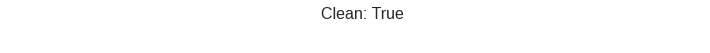

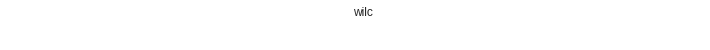

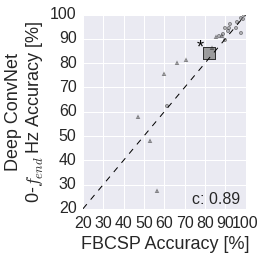

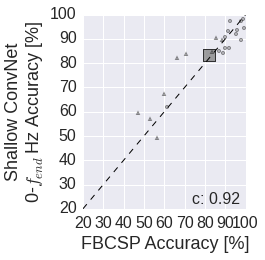

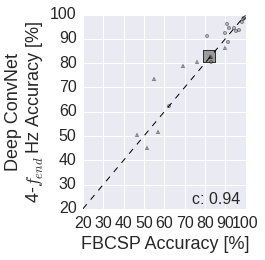

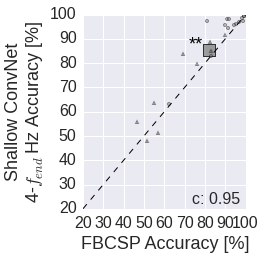

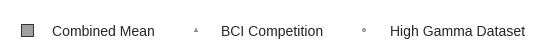

In [315]:
%config InlineBackend.figure_format = 'png' 

all_labels = []
for clean in (True,) : #False
    plt.figure(figsize=(12,0.1))
    plt.title("Clean: " + str(clean), fontsize=16)
    plt.axis('off')
    for stat_test in ('wilc', ):#'sign','rand',
        plt.figure(figsize=(12,0.1))
        plt.title(stat_test)
        plt.axis('off')
        for freq in ('>0', '>4'):
            for net in ('deep5', 'shallow'):
                fig = plt.figure(figsize=(3.5,3.5))
                for train_type in ('cnt',):
                    for dataset in ('combined',):#, 'ours', 'bcic'
                        this_row = all_compared[(all_compared.dataset == dataset) &
                                               (all_compared.freq == freq) &
                                               (all_compared.train_type == train_type) &
                                               (all_compared.name == net) &
                                                (all_compared.clean == clean)]
                        if net == 'merged' and freq == '0-4': continue
                        assert len(this_row) == 1
                        this_row = this_row.iloc[0]
                        if net == 'deep5':
                            marker = 'o'
                        elif net == 'merged':
                            marker = 's'
                        else:
                            assert net == 'shallow'
                            marker = '^'
                        if dataset == 'bcic':
                            marker = '^'
                        elif dataset == 'ours':
                            marker = 'o'
                        if '>0' == freq:
                            color = seaborn.color_palette()[0]
                        elif '>4' == freq:
                            color = seaborn.color_palette()[1]
                        else:
                            assert freq == '0-4'
                            color = seaborn.color_palette()[3]
                        color=(0.5,0.5,0.5)
                        markerfacecolor = 'None'
                        markersize=10
                        if train_type == 'epo':
                            markersize=17

                        markerfacecolor = 'None'
                        markeredgecolor = color
                        if 'cnt' == train_type:
                            markerfacecolor = color + (0.75,) # some alpha
                            markeredgecolor = 'black'

                        test_csp = this_row['test_csp']
                        test_net = this_row['test_net']

                        if dataset == 'combined':
                            plt.plot(test_csp, test_net, color=color, 
                                 marker='s', linestyle='None', markersize=markersize+2, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)
                        else:
                            plt.plot(test_csp, test_net, color=color, 
                                 marker=marker, linestyle='None', markersize=markersize, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)

                        # add significance star
                        if this_row[stat_test] < 0.05:
                            if this_row[stat_test] < 0.001:
                                signicance_str = '***'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))
                            elif this_row[stat_test] < 0.01:
                                signicance_str = '**'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))

                            else:
                                signicance_str = '*'
                                sig_count_weak.append(int(np.sign(test_net - test_csp)))
                            if test_csp < test_net:
                                xytext = (-6, -2)
                            else:
                                xytext = (3,-12)
                            plt.annotate(
                                signicance_str, xy = (test_csp, test_net), xytext = xytext, fontsize=18,
                                textcoords = 'offset points', ha = 'right', va = 'bottom',
                                color='black')
                        """
                        dataset_str = dataset.upper()[:4].replace("OURS", "HGD")

                        xytext=(-25,10)
                        if dataset == 'combined':
                            xytext = (-25,5)
                        plt.annotate(dataset_str,xy=(test_csp, test_net), xytext=xytext,
                                     textcoords='offset points', va='center',
                                ha='right', fontsize=14, color=(0.3,)*3,
                            arrowprops=dict(arrowstyle="->", color=(0.,)*3))
                        """
                        if dataset == 'combined':
                            df_net = all_df[
                                   (all_df.freq == freq) &
                                   (all_df.train_type == train_type) &
                                   (all_df.net == net) &
                                    (all_df.clean == clean)]

                            df_csp = all_df[
                                   (all_df.freq == freq) &
                                   (all_df.net == 'csp') &
                                    (all_df.clean == clean)]

                            df_merged = df_net.merge(df_csp, on='dataset_filename', suffixes=('_net','_csp'))
                            test_per_sub_csp_bcic = df_merged[df_merged.dataset_net == 'bcic'].test_csp
                            test_per_sub_csp_ours = df_merged[df_merged.dataset_net == 'ours'].test_csp
                            test_per_sub_net_bcic = df_merged[df_merged.dataset_net == 'bcic'].test_net
                            test_per_sub_net_ours = df_merged[df_merged.dataset_net == 'ours'].test_net
                            plt.plot(test_per_sub_csp_bcic, test_per_sub_net_bcic, color=color, 
                                 marker='^', linestyle='None', markersize=3, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1, alpha=0.4)
                            plt.plot(test_per_sub_csp_ours, test_per_sub_net_ours, color=color, 
                                 marker='o', linestyle='None', markersize=3, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1, alpha=0.4)
                            test_per_sub_csp = np.concatenate([test_per_sub_csp_bcic, test_per_sub_csp_ours])
                            test_per_sub_net = np.concatenate([test_per_sub_net_bcic, test_per_sub_net_ours])
                            correlation = np.corrcoef(test_per_sub_csp, test_per_sub_net)[0,1]
                            n_above = np.sum(test_per_sub_net > test_per_sub_csp)
                            n_below = np.sum(test_per_sub_net < test_per_sub_csp)


                #min_x_y = min(plt.xlim()[0], plt.ylim()[0])
                #max_x_y = max(plt.xlim()[1], plt.ylim()[1])
                #plt.plot([min_x_y-5,max_x_y+5], [min_x_y-5,max_x_y+5], color='black', label='', linestyle='--', lw=1)
                plt.plot([20,100], [20,100], color='black', label='', linestyle='--', lw=1)

                plt.xlabel('FBCSP Accuracy [%]', fontsize=18)

                net_str = net.capitalize().replace("5", "")
                y_label_str = "{:s} ConvNet\n{:d}-$f_{{end}}$ Hz Accuracy [%]".format(net_str, 
                                                              int(freq[1]))
                plt.ylabel(y_label_str, fontsize=18)

                ax = plt.gca()

                plt.tight_layout()
                plt.annotate(u"c: {:.2f}".format(correlation),xy=(97,24),
                            fontsize=16, ha='right', va='center')
                #plt.annotate(u"Above: {:d}".format(n_above),xy=(23,93),
                #            fontsize=16, ha='left')

                #plt.annotate(u"Below: {:d}".format(n_below),xy=(97,33),
                #            fontsize=16, ha='right')


                # We change the fontsize of minor ticks label 
                plt.gca().tick_params(axis='both', which='major', labelsize=16)

                """circle = plt.Circle((84,84), 4, facecolor='None', linestyle='dotted', linewidth=1)
                plt.gca().add_artist(circle)
                plt.annotate(u"Main\ncomparison",xy=(84,84), xytext=(-25,15), textcoords='offset points', va='center',
                            ha='right', fontsize=16, color=(0.3,)*3)"""

                ax = plt.gca()
                title_str = "{:s} {:d}-$f_{{end}}$ Hz".format(net.capitalize().replace("5", ""), 
                                                              int(freq[1]))
                #plt.title(title_str, fontsize=16, y=1.02)
                #title_str = dataset.capitalize().replace("Ours", "HGD") + " " + clean_str
                #plt.title('{:s}'.format(title_str), fontsize=16)
        
        handles, labels = ax.get_legend_handles_labels()
        plt.figure(figsize=(0.1,0.1))
        ax = plt.gca()
        ax.legend(np.array(handles), ["Combined Mean", "BCI Competition", "High Gamma Dataset", ], 
                  bbox_to_anchor=(2.,1.05), fontsize=14, ncol=3)
        plt.axis('off')


### With column/row labels

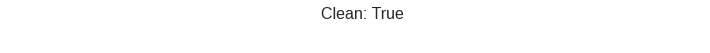

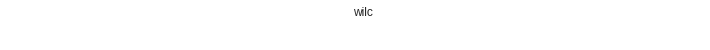

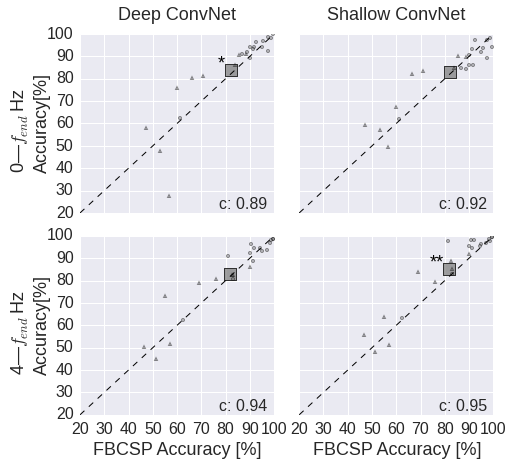

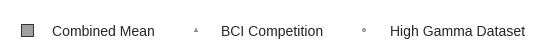

In [379]:
%config InlineBackend.figure_format = 'png' 

all_labels = []
for clean in (True,) : #False
    plt.figure(figsize=(12,0.1))
    plt.title("Clean: " + str(clean), fontsize=16)
    plt.axis('off')
    for stat_test in ('wilc', ):#'sign','rand',
        plt.figure(figsize=(12,0.1))
        plt.title(stat_test)
        plt.axis('off')
        fig, axes = plt.subplots(2,2,figsize=(6.5,6.5), sharex=True, sharey=True)
        axes = np.array(axes).flatten()
        i_plot = 0
        for freq in ('>0', '>4'):
            for net in ('deep5', 'shallow'):
                for train_type in ('cnt',):
                    for dataset in ('combined',):#, 'ours', 'bcic'
                        this_row = all_compared[(all_compared.dataset == dataset) &
                                               (all_compared.freq == freq) &
                                               (all_compared.train_type == train_type) &
                                               (all_compared.name == net) &
                                                (all_compared.clean == clean)]
                        if net == 'merged' and freq == '0-4': continue
                        assert len(this_row) == 1
                        this_row = this_row.iloc[0]
                        if net == 'deep5':
                            marker = 'o'
                        elif net == 'merged':
                            marker = 's'
                        else:
                            assert net == 'shallow'
                            marker = '^'
                        if dataset == 'bcic':
                            marker = '^'
                        elif dataset == 'ours':
                            marker = 'o'
                        if '>0' == freq:
                            color = seaborn.color_palette()[0]
                        elif '>4' == freq:
                            color = seaborn.color_palette()[1]
                        else:
                            assert freq == '0-4'
                            color = seaborn.color_palette()[3]
                        color=(0.5,0.5,0.5)
                        markerfacecolor = 'None'
                        markersize=10
                        if train_type == 'epo':
                            markersize=17

                        markerfacecolor = 'None'
                        markeredgecolor = color
                        if 'cnt' == train_type:
                            markerfacecolor = color + (0.75,) # some alpha
                            markeredgecolor = 'black'

                        test_csp = this_row['test_csp']
                        test_net = this_row['test_net']
                        plt.sca(axes[i_plot])
                        i_plot += 1
                        
                        if dataset == 'combined':
                            plt.plot(test_csp, test_net, color=color, 
                                 marker='s', linestyle='None', markersize=markersize+2, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)
                        else:
                            plt.plot(test_csp, test_net, color=color, 
                                 marker=marker, linestyle='None', markersize=markersize, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)

                        # add significance star
                        if this_row[stat_test] < 0.05:
                            if this_row[stat_test] < 0.001:
                                signicance_str = '***'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))
                            elif this_row[stat_test] < 0.01:
                                signicance_str = '**'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))

                            else:
                                signicance_str = '*'
                                sig_count_weak.append(int(np.sign(test_net - test_csp)))
                            if test_csp < test_net:
                                xytext = (-6, -2)
                            else:
                                xytext = (3,-12)
                            plt.annotate(
                                signicance_str, xy = (test_csp, test_net), xytext = xytext, fontsize=18,
                                textcoords = 'offset points', ha = 'right', va = 'bottom',
                                color='black')
                        """
                        dataset_str = dataset.upper()[:4].replace("OURS", "HGD")

                        xytext=(-25,10)
                        if dataset == 'combined':
                            xytext = (-25,5)
                        plt.annotate(dataset_str,xy=(test_csp, test_net), xytext=xytext,
                                     textcoords='offset points', va='center',
                                ha='right', fontsize=14, color=(0.3,)*3,
                            arrowprops=dict(arrowstyle="->", color=(0.,)*3))
                        """
                        if dataset == 'combined':
                            df_net = all_df[
                                   (all_df.freq == freq) &
                                   (all_df.train_type == train_type) &
                                   (all_df.net == net) &
                                    (all_df.clean == clean)]

                            df_csp = all_df[
                                   (all_df.freq == freq) &
                                   (all_df.net == 'csp') &
                                    (all_df.clean == clean)]

                            df_merged = df_net.merge(df_csp, on='dataset_filename', suffixes=('_net','_csp'))
                            test_per_sub_csp_bcic = df_merged[df_merged.dataset_net == 'bcic'].test_csp
                            test_per_sub_csp_ours = df_merged[df_merged.dataset_net == 'ours'].test_csp
                            test_per_sub_net_bcic = df_merged[df_merged.dataset_net == 'bcic'].test_net
                            test_per_sub_net_ours = df_merged[df_merged.dataset_net == 'ours'].test_net
                            plt.plot(test_per_sub_csp_bcic, test_per_sub_net_bcic, color=color, 
                                 marker='^', linestyle='None', markersize=3, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1, alpha=0.4)
                            plt.plot(test_per_sub_csp_ours, test_per_sub_net_ours, color=color, 
                                 marker='o', linestyle='None', markersize=3, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1, alpha=0.4)
                            test_per_sub_csp = np.concatenate([test_per_sub_csp_bcic, test_per_sub_csp_ours])
                            test_per_sub_net = np.concatenate([test_per_sub_net_bcic, test_per_sub_net_ours])
                            correlation = np.corrcoef(test_per_sub_csp, test_per_sub_net)[0,1]
                            n_above = np.sum(test_per_sub_net > test_per_sub_csp)
                            n_below = np.sum(test_per_sub_net < test_per_sub_csp)


                #min_x_y = min(plt.xlim()[0], plt.ylim()[0])
                #max_x_y = max(plt.xlim()[1], plt.ylim()[1])
                #plt.plot([min_x_y-5,max_x_y+5], [min_x_y-5,max_x_y+5], color='black', label='', linestyle='--', lw=1)
                plt.plot([20,100], [20,100], color='black', label='', linestyle='--', lw=1)
                
                
                if i_plot > 2:
                    plt.xlabel('FBCSP Accuracy [%]', fontsize=18)
                if i_plot <= 2:
                    net_str = net.capitalize().replace("5", "")
                    title_str = "{:s} ConvNet".format(net_str)
                    plt.title(title_str, fontsize=18, y=1.05)
                
                if i_plot % 2 == 1:
                    y_label_str = u'{:d}—$f_{{end}}$ Hz\nAccuracy[%]'.format(int(freq[1]))
                    #plt.ylabel(y_label_str, fontsize=18)
                    plt.text(-10,60,y_label_str, va='center', rotation=90,
                            fontsize=18)

                ax = plt.gca()

                plt.tight_layout()
                plt.annotate(u"c: {:.2f}".format(correlation),xy=(97,24),
                            fontsize=16, ha='right', va='center')
                #plt.annotate(u"Above: {:d}".format(n_above),xy=(23,93),
                #            fontsize=16, ha='left')

                #plt.annotate(u"Below: {:d}".format(n_below),xy=(97,33),
                #            fontsize=16, ha='right')


                # We change the fontsize of minor ticks label 
                plt.gca().tick_params(axis='both', which='major', labelsize=16)

                """circle = plt.Circle((84,84), 4, facecolor='None', linestyle='dotted', linewidth=1)
                plt.gca().add_artist(circle)
                plt.annotate(u"Main\ncomparison",xy=(84,84), xytext=(-25,15), textcoords='offset points', va='center',
                            ha='right', fontsize=16, color=(0.3,)*3)"""

                ax = plt.gca()
                title_str = "{:s} {:d}-$f_{{end}}$ Hz".format(net.capitalize().replace("5", ""), 
                                                              int(freq[1]))
                #plt.title(title_str, fontsize=16, y=1.02)
                #title_str = dataset.capitalize().replace("Ours", "HGD") + " " + clean_str
                #plt.title('{:s}'.format(title_str), fontsize=16)
        
        handles, labels = ax.get_legend_handles_labels()
        plt.figure(figsize=(0.1,0.1))
        ax = plt.gca()
        ax.legend(np.array(handles), ["Combined Mean", "BCI Competition", "High Gamma Dataset", ], 
                  bbox_to_anchor=(2.,1.05), fontsize=14, ncol=3)
        plt.axis('off')


#### for merged net

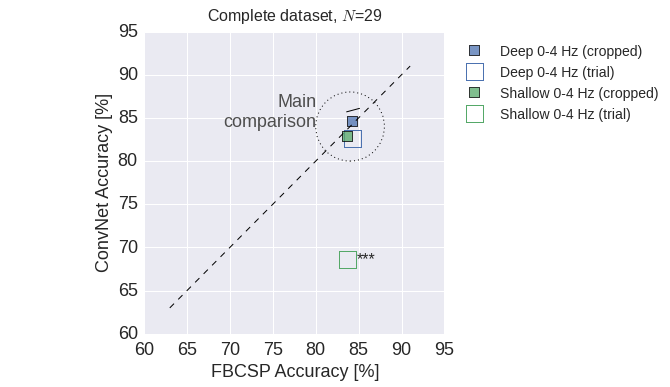

In [66]:
%config InlineBackend.figure_format = 'png' 
clean = False
dataset = 'combined'
fig = plt.figure(figsize=(5,5))

all_labels = []
sig_count_strong = []
sig_count_weak = []
for freq in ('>0', '>4'):
    for net in ('merged',):
        for train_type in ('cnt', 'epo',):
            this_row = all_compared[(all_compared.dataset == dataset) &
                                   (all_compared.freq == freq) &
                                   (all_compared.train_type == train_type) &
                                   (all_compared.name == net) &
                                    (all_compared.clean == clean)]
            if net == 'merged' and freq == '0-4': continue
            assert len(this_row) == 1
            this_row = this_row.iloc[0]
            if net == 'deep5':
                marker = 'o'
            elif net == 'merged':
                marker = 's'
            else:
                assert net == 'shallow'
                marker = '^'
            if '>0' == freq:
                color = seaborn.color_palette()[0]
            elif '>4' == freq:
                color = seaborn.color_palette()[1]
            else:
                assert freq == '0-4'
                color = seaborn.color_palette()[3]
            """if dataset == 'ours':
                hsv = rgb_to_hsv(np.array([[color]]))
                hsv[0,0,1:] *= 1.1
                color = tuple(hsv_to_rgb(hsv)[0,0])
            elif dataset == 'bcic':
                hsv = rgb_to_hsv(np.array([[color]]))
                hsv[0,0,1:] *= 0.85
                color = tuple(hsv_to_rgb(hsv)[0,0])
            else:
                hsv = rgb_to_hsv(np.array([[color]]))
                hsv[0,0,1:] *= 1.3
                assert np.all(np.logical_or(hsv <= 1, hsv >= 0.))
                color = tuple(hsv_to_rgb(hsv)[0,0])
            assert np.all(np.logical_or(color <= 1, color >= 0.))"""

            markerfacecolor = 'None'
            markersize=10
            if train_type == 'epo':
                markersize=17

            markerfacecolor = 'None'
            markeredgecolor = color
            if 'cnt' == train_type:
                markerfacecolor = color + (0.75,) # some alpha
                markeredgecolor = 'black'

            test_csp = this_row['test_csp']
            test_net = this_row['test_net']


            plt.plot(test_csp, test_net, color=color, 
                     marker=marker, linestyle='None', markersize=markersize, label='dummy',
                    markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                    markeredgewidth=1)

            # add significance star
            if this_row['rand'] < 0.05:
                if this_row['rand'] < 0.001:
                    signicance_str = '***'
                    sig_count_strong.append(int(np.sign(test_net - test_csp)))
                elif this_row['rand'] < 0.01:
                    signicance_str = '**'
                    sig_count_strong.append(int(np.sign(test_net - test_csp)))

                else:
                    signicance_str = '*'
                    sig_count_weak.append(int(np.sign(test_net - test_csp)))
                plt.annotate(
                    signicance_str, xy = (test_csp, test_net), xytext = (10, 0), fontsize=16,
                    textcoords = 'offset points', ha = 'left', va = 'center',)


min_x_y = min(plt.xlim()[0], plt.ylim()[0])
max_x_y = max(plt.xlim()[1], plt.ylim()[1])
plt.plot([min_x_y-5,max_x_y+5], [min_x_y-5,max_x_y+5], color='black', label='', linestyle='--', lw=1)


plt.xlabel('FBCSP Accuracy [%]', fontsize=18)

plt.ylabel('ConvNet Accuracy [%]', fontsize=18)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, (
                           'Deep 0-4 Hz (cropped)', 
                           'Deep 0-4 Hz (trial)',
                           'Shallow 0-4 Hz (cropped)',
                           'Shallow 0-4 Hz (trial)',
                           'Deep 0-125 Hz (cropped)', 
                           'Deep 0-125 Hz (trial)',
                           'Shallow 0-125 Hz (cropped)',
                           'Shallow 0-125 Hz (trial)',
                           'Deep 4-125 Hz (cropped)', 
                           'Deep 4-125 Hz (trial)',
                           'Shallow 4-125 Hz (cropped)',
                           'Shallow 4-125 Hz (trial)',),
          bbox_to_anchor=(1.75,1),fontsize=14)

plt.tight_layout()
plt.annotate(u"$N_{{ConvNet>FBCSP}}$ = {:d}".format(np.sum(np.array(sig_count_strong) == 1)
                                            + np.sum(np.array(sig_count_weak) == 1)),xy=(56,92),
            fontsize=22)
plt.annotate(u"$N_{{ConvNet<FBCSP}}$ = {:d}".format(np.sum(np.array(sig_count_strong) == -1)
                                            + np.sum(np.array(sig_count_weak) == -1)),xy=(93,57),
            fontsize=22, ha='right')


# We change the fontsize of minor ticks label 
plt.gca().tick_params(axis='both', which='major', labelsize=18)

circle = plt.Circle((84,84), 4, facecolor='None', linestyle='dotted', linewidth=1)
plt.gca().add_artist(circle)
plt.annotate(u"Main\ncomparison",xy=(84,84), xytext=(-35,15), textcoords='offset points', va='center',
            ha='right', fontsize=18, color=(0.3,)*3)

ax = plt.gca()
clean_str = 'Restricted subjects' if clean else 'All subjects'
plt.title("Complete dataset, $N$=29", fontsize=16, y=1.02)
#title_str = dataset.capitalize().replace("Ours", "HGD") + " " + clean_str
#plt.title('{:s}'.format(title_str), fontsize=16)

# add small line for significance star
this_row = all_compared[(all_compared.dataset == 'combined') &
                       (all_compared.freq == '>4') &
                       (all_compared.train_type == 'cnt') &
                       (all_compared.name == 'shallow') &
                        (all_compared.clean == False)]
this_row = this_row.iloc[0]
plt.plot([this_row.test_csp,this_row.test_csp+1.5],[this_row.test_net-0.2,this_row.test_net+0.2], color='black',
         linewidth=1)

###### significance tests hybrid vs deep and retests of main result with different significance tests

In [159]:
all_compared[(all_compared.dataset == 'combined') & 
            (all_compared.clean == True) &
            (all_compared.train_type =='cnt')]

,name,freq,dataset,test_csp,test_net,diff,std,stderr,rand,wilc,sign,time_net,clean,train_type
0,deep5,>0,combined,82.1,84.0,1.9,8.3,1.7,0.315499,0.023325,0.034690,00:42:22,True,cnt
0,merged,>0,combined,82.1,83.8,1.8,5.6,1.2,0.160913,0.427418,1.000000,00:46:19,True,cnt
0,shallow,>0,combined,82.1,83.2,1.1,6.2,1.3,0.416855,0.709014,0.677639,00:22:15,True,cnt
0,deep5,>4,combined,81.9,83.1,1.2,5.5,1.1,0.319158,0.893212,1.000000,00:39:43,True,cnt
0,merged,>4,combined,81.9,82.1,0.3,6.0,1.2,0.830881,0.799773,0.677639,00:48:40,True,cnt
0,shallow,>4,combined,81.9,85.2,3.4,5.2,1.1,0.003603,0.002136,0.000488,00:26:43,True,cnt


In [193]:
deep_above_0 = all_df[(all_df.freq == '>0') &
                           (all_df.train_type == 'cnt')& 
                           (all_df.net == 'deep5') &
                           (all_df.clean == True)]
deep_above_4 = all_df[(all_df.freq == '>4') &
                           (all_df.train_type == 'cnt')& 
                           (all_df.net == 'deep5') &
                           (all_df.clean == True)]
csp_acc_above_0 = all_df[(all_df.freq == '>0') &
                           (all_df.train_type == 'epo')& 
                           (all_df.net == 'csp') &
                           (all_df.clean == True)]
csp_acc_above_4 = all_df[(all_df.freq == '>4') &
                           (all_df.train_type == 'epo')& 
                           (all_df.net == 'csp') &
                           (all_df.clean == True)]
merged_above_0 = all_df[(all_df.freq == '>0') &
                           (all_df.train_type == 'cnt')& 
                           (all_df.net == 'merged') &
                           (all_df.clean == True)]
merged_above_4 = all_df[(all_df.freq == '>4') &
                           (all_df.train_type == 'cnt')& 
                           (all_df.net == 'merged') &
                           (all_df.clean == True)]

In [197]:
deep_vs_csp_0 = csp_acc_above_0.merge(deep_above_0, on=('dataset_filename', 'freq'))
assert len(deep_vs_csp_0) == 23

In [198]:
deep_vs_csp_4 = csp_acc_above_4.merge(deep_above_4, on=('dataset_filename', 'freq'))
assert len(deep_vs_csp_4) == 23

In [202]:
wilcoxon_signed_rank(deep_vs_csp_0.test_x, deep_vs_csp_0.test_y)

0.023324728012084961

In [203]:
from scipy import stats

In [209]:
stats.wilcoxon(deep_vs_csp_0.test_x, deep_vs_csp_0.test_y, zero_method='zsplit')

WilcoxonResult(statistic=63.5, pvalue=0.023352436044260946)

In [181]:
compare_net_csp(deep_above_0, merged_above_0, '','','', with_csp_acc=True,
               max_n_p_vals=2)

,name,freq,dataset,test_csp,test_net,diff,rand,wilc,sign,time_net
0,,,,83.8,84,0.2,1,0.559958,0.677639,00:42:22


In [182]:
compare_net_csp(deep_above_4, merged_above_4, '','','', with_csp_acc=True,
               max_n_p_vals=2)

,name,freq,dataset,test_csp,test_net,diff,rand,wilc,sign,time_net
0,,,,82.1,83.1,1,0.75,0.916847,0.677639,00:39:43


## Without ELU/Bnorm/Drop

In [70]:
all_df_past = pd.DataFrame()
for dataset in ('bcic', 'ours'):
    for net in 'shallow', 'deep5':
        for training in 'epo', 'cnt':
            for band in ['>0', '>4']:
                for clean in (True, False):
                    if dataset == 'bcic':
                        dfc = df_csp_bcic
                    else:
                        assert dataset == 'ours'
                        dfc = df_csp_ours
                    if dataset == 'bcic' and net == 'shallow' and training == 'cnt':
                        dfn = df_shallow_cnt_bcic
                    elif dataset == 'bcic' and net == 'shallow' and training == 'epo':
                        dfn = df_shallow_epo_bcic
                    elif dataset == 'bcic' and net == 'deep5' and training == 'cnt':
                        dfn = df_deep_cnt_bcic
                    elif dataset == 'bcic' and net == 'deep5' and training == 'epo':
                        dfn = df_deep_epo_bcic
                    elif dataset == 'ours' and net == 'shallow' and training == 'cnt':
                        dfn = df_shallow_cnt_ours
                    elif dataset == 'ours' and net == 'shallow' and training == 'epo':
                        dfn = df_shallow_epo_ours
                    elif dataset == 'ours' and net == 'deep5' and training == 'cnt':
                        dfn = df_deep_cnt_ours
                    elif dataset == 'ours' and net == 'deep5' and training == 'epo':
                        dfn = df_deep_epo_ours
                    else:
                        raise ValueError("Unknown combination")
                    if clean:
                        dfn = clean_datasets(dfn)
                        dfc = clean_datasets(dfc)
                    
                    dfn = past(dfn)
                        
                    if band == '>0':
                        this_dfn = above_0(dfn)
                        this_dfc = csp_above_0(dfc)
                    elif band == '>4':
                        this_dfn = above_4(dfn)
                        this_dfc = csp_above_4(dfc)
                    elif band == '0-4':
                        this_dfn = from_0_to_4(dfn)
                        this_dfc = csp_0_to_4(dfc)
                        
                    if training == 'cnt':
                        this_dfn = tied_loss(this_dfn)
                        
                    this_dfc = main_comp_csp(this_dfc)
                    
                    this_dfc = this_dfc[this_dfc.trial_start == 500]
                    if training == 'epo':
                        this_dfn = this_dfn[this_dfn.trial_start == -500]
                    else:
                        assert training == 'cnt'
                        this_dfn = this_dfn[this_dfn.trial_start == 1500]
                        
                    this_dfc = restrict_or_missing_col(this_dfc, max_abs_threshold=800)
                    
                    if dataset == 'bcic' and net == 'deep5' and (
                        training == 'epo' or (band == '>0' or band == '>4')):
                        this_dfn = this_dfn[this_dfn.layers == 'deep_5']
                    if training == 'epo':
                        this_dfn = this_dfn[this_dfn.max_increasing_epochs == 160]
                    else:
                        assert training == 'cnt'
                        this_dfn = this_dfn[this_dfn.max_increasing_epochs == 80]

                    if dataset == 'bcic':
                        assert len(this_dfc) == 9, "wrong length: {:d} ({:s})".format(
                            len(this_dfc), str((dataset, net, training, band, clean)))
                        assert len(this_dfn) == 9, "wrong length: {:d} ({:s})".format(
                            len(this_dfn), str((dataset, net, training, band, clean)))
                    elif dataset == 'ours' and clean:
                        assert len(this_dfc) == 14, "wrong length: {:d} ({:s})".format(
                            len(this_dfc), str((dataset, net, training, band, clean)))
                        assert len(this_dfn) == 14, "wrong length: {:d} ({:s})".format(
                            len(this_dfn), str((dataset, net, training, band, clean)))
                    elif dataset == 'ours' and (not clean):
                        assert len(this_dfc) == 20, "wrong length: {:d} ({:s})".format(
                            len(this_dfc), str((dataset, net, training, band, clean)))
                        assert len(this_dfn) == 20, "wrong length: {:d} ({:s})".format(
                            len(this_dfn), str((dataset, net, training, band, clean)))
                    else:
                        raise ValueError("Unknown combination")

                
                    this_dfn = remove_columns_with_same_value(this_dfn)
                    this_dfn['clean'] = clean
                    this_dfn['net'] = net
                    this_dfn['train_type'] = training
                    this_dfn['freq'] = band
                    this_dfn['dataset'] = dataset

                    all_df_past = all_df_past.append(this_dfn)
                    # no need to add csp... comparison csp stays same

In [75]:
assert len(all_df_past) == 8 * 29 +  8* 23 # no csp

In [76]:
all_compared_past = pd.DataFrame()
param_keys = ['dataset', 'freq', 'net',  'train_type', 'clean']
all_groups = all_df_past.groupby(param_keys)

for name, group in all_groups:
    assert len(group['freq'].unique()) == 1
    freq = group['freq'].iloc[0]
    assert len(group['dataset'].unique()) == 1
    dataset = group['dataset'].iloc[0]
    assert len(group['net'].unique()) == 1
    net = group['net'].iloc[0]
    assert len(group['clean'].unique()) == 1
    clean = group['clean'].iloc[0]
    assert len(group['train_type'].unique()) == 1
    train_type = group['train_type'].iloc[0]
    if net == 'csp': continue
    log.info("{:s} {:s} {:s} {:s} (clean: {:s})".format(dataset,
                                                        freq,net, train_type, str(clean)))
    csp = all_df[(all_df.net == 'csp') & (all_df.freq == freq) &
                (all_df.dataset == dataset) &
                (all_df.clean == clean)]
    df_compare = compare_net_csp(group, csp, net, freq, dataset, with_csp_acc=True, with_std=True,
                                with_std_error=True)   
    df_compare['clean'] = clean
    df_compare['train_type'] = train_type
    all_compared_past = all_compared_past.append(df_compare)


param_keys = ['freq', 'net',  'train_type', 'clean']
all_groups = all_df_past.groupby(param_keys)

for name, group in all_groups:
    assert len(group['freq'].unique()) == 1
    freq = group['freq'].iloc[0]
    assert len(group['net'].unique()) == 1
    net = group['net'].iloc[0]
    assert len(group['clean'].unique()) == 1
    clean = group['clean'].iloc[0]
    assert len(group['train_type'].unique()) == 1
    train_type = group['train_type'].iloc[0]
    if net == 'csp': continue
    log.info("combined: {:s} {:s} {:s} (clean: {:s})".format(freq,net, train_type, str(clean)))
    csp = all_df[(all_df.net == 'csp') & (all_df.freq == freq) &
                (all_df.clean == clean)]
    assert (len(csp) == 29 and not clean) or (len(csp) == 23 and clean)
    df_compare = compare_net_csp(group, csp, net, freq, 'combined', with_csp_acc=True, with_std=True,
                                with_std_error=True)
    df_compare['clean'] = clean
    df_compare['train_type'] = train_type
    all_compared_past = all_compared_past.append(df_compare)

INFO:root:bcic >0 deep5 cnt (clean: False)
INFO:root:bcic >0 deep5 cnt (clean: True)
INFO:root:bcic >0 deep5 epo (clean: False)
INFO:root:bcic >0 deep5 epo (clean: True)
INFO:root:bcic >0 shallow cnt (clean: False)
INFO:root:bcic >0 shallow cnt (clean: True)
INFO:root:bcic >0 shallow epo (clean: False)
INFO:root:bcic >0 shallow epo (clean: True)
INFO:root:bcic >4 deep5 cnt (clean: False)
INFO:root:bcic >4 deep5 cnt (clean: True)
INFO:root:bcic >4 deep5 epo (clean: False)
INFO:root:bcic >4 deep5 epo (clean: True)
INFO:root:bcic >4 shallow cnt (clean: False)
INFO:root:bcic >4 shallow cnt (clean: True)
INFO:root:bcic >4 shallow epo (clean: False)
INFO:root:bcic >4 shallow epo (clean: True)
INFO:root:ours >0 deep5 cnt (clean: False)
INFO:root:ours >0 deep5 cnt (clean: True)
INFO:root:ours >0 deep5 epo (clean: False)
INFO:root:ours >0 deep5 epo (clean: True)
INFO:root:ours >0 shallow cnt (clean: False)
INFO:root:ours >0 shallow cnt (clean: True)
INFO:root:ours >0 shallow epo (clean: False)


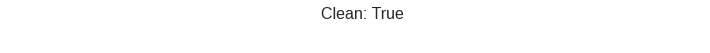

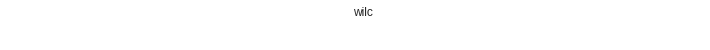

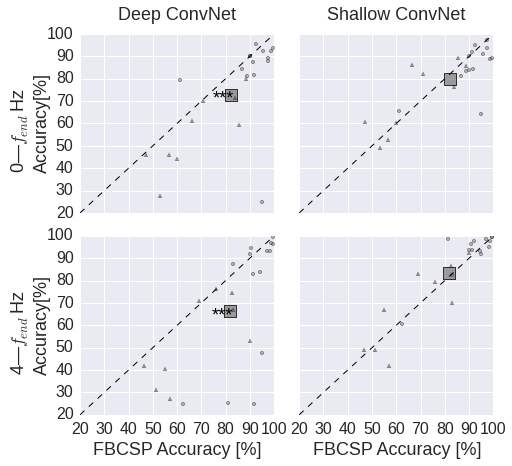

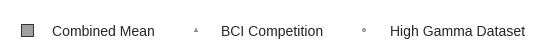

In [378]:
%config InlineBackend.figure_format = 'png' 

all_labels = []
for clean in (True,) : #False
    plt.figure(figsize=(12,0.1))
    plt.title("Clean: " + str(clean), fontsize=16)
    plt.axis('off')
    for stat_test in ('wilc', ):#'sign','rand',
        plt.figure(figsize=(12,0.1))
        plt.title(stat_test)
        plt.axis('off')
        fig, axes = plt.subplots(2,2,figsize=(6.5,6.5), sharex=True, sharey=True)
        axes = np.array(axes).flatten()
        i_plot = 0
        for freq in ('>0', '>4'):
            for net in ('deep5', 'shallow'):
                for train_type in ('cnt',):
                    for dataset in ('combined',):#, 'ours', 'bcic'
                        this_row = all_compared_past[(all_compared_past.dataset == dataset) &
                                               (all_compared_past.freq == freq) &
                                               (all_compared_past.train_type == train_type) &
                                               (all_compared_past.name == net) &
                                                (all_compared_past.clean == clean)]
                        if net == 'merged' and freq == '0-4': continue
                        assert len(this_row) == 1
                        this_row = this_row.iloc[0]
                        if net == 'deep5':
                            marker = 'o'
                        elif net == 'merged':
                            marker = 's'
                        else:
                            assert net == 'shallow'
                            marker = '^'
                        if dataset == 'bcic':
                            marker = '^'
                        elif dataset == 'ours':
                            marker = 'o'
                        if '>0' == freq:
                            color = seaborn.color_palette()[0]
                        elif '>4' == freq:
                            color = seaborn.color_palette()[1]
                        else:
                            assert freq == '0-4'
                            color = seaborn.color_palette()[3]
                        color=(0.5,0.5,0.5)
                        markerfacecolor = 'None'
                        markersize=10
                        if train_type == 'epo':
                            markersize=17

                        markerfacecolor = 'None'
                        markeredgecolor = color
                        if 'cnt' == train_type:
                            markerfacecolor = color + (0.75,) # some alpha
                            markeredgecolor = 'black'

                        test_csp = this_row['test_csp']
                        test_net = this_row['test_net']
                        plt.sca(axes[i_plot])
                        i_plot += 1
                        
                        if dataset == 'combined':
                            plt.plot(test_csp, test_net, color=color, 
                                 marker='s', linestyle='None', markersize=markersize+2, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)
                        else:
                            plt.plot(test_csp, test_net, color=color, 
                                 marker=marker, linestyle='None', markersize=markersize, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1)

                        # add significance star
                        if this_row[stat_test] < 0.05:
                            if this_row[stat_test] < 0.001:
                                signicance_str = '***'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))
                            elif this_row[stat_test] < 0.01:
                                signicance_str = '**'
                                sig_count_strong.append(int(np.sign(test_net - test_csp)))

                            else:
                                signicance_str = '*'
                                sig_count_weak.append(int(np.sign(test_net - test_csp)))
                            if test_csp < test_net:
                                xytext = (-6, -2)
                            else:
                                xytext = (3,-12)
                            plt.annotate(
                                signicance_str, xy = (test_csp, test_net), xytext = xytext, fontsize=18,
                                textcoords = 'offset points', ha = 'right', va = 'bottom',
                                color='black')
                        """
                        dataset_str = dataset.upper()[:4].replace("OURS", "HGD")

                        xytext=(-25,10)
                        if dataset == 'combined':
                            xytext = (-25,5)
                        plt.annotate(dataset_str,xy=(test_csp, test_net), xytext=xytext,
                                     textcoords='offset points', va='center',
                                ha='right', fontsize=14, color=(0.3,)*3,
                            arrowprops=dict(arrowstyle="->", color=(0.,)*3))
                        """
                        if dataset == 'combined':
                            df_net = all_df_past[
                                   (all_df_past.freq == freq) &
                                   (all_df_past.train_type == train_type) &
                                   (all_df_past.net == net) &
                                    (all_df_past.clean == clean)]

                            df_csp = all_df[
                                   (all_df.freq == freq) &
                                   (all_df.net == 'csp') &
                                    (all_df.clean == clean)]

                            df_merged = df_net.merge(df_csp, on='dataset_filename', suffixes=('_net','_csp'))
                            test_per_sub_csp_bcic = df_merged[df_merged.dataset_net == 'bcic'].test_csp
                            test_per_sub_csp_ours = df_merged[df_merged.dataset_net == 'ours'].test_csp
                            test_per_sub_net_bcic = df_merged[df_merged.dataset_net == 'bcic'].test_net
                            test_per_sub_net_ours = df_merged[df_merged.dataset_net == 'ours'].test_net
                            plt.plot(test_per_sub_csp_bcic, test_per_sub_net_bcic, color=color, 
                                 marker='^', linestyle='None', markersize=3, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1, alpha=0.4)
                            plt.plot(test_per_sub_csp_ours, test_per_sub_net_ours, color=color, 
                                 marker='o', linestyle='None', markersize=3, label='dummy',
                                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                                markeredgewidth=1, alpha=0.4)
                            test_per_sub_csp = np.concatenate([test_per_sub_csp_bcic, test_per_sub_csp_ours])
                            test_per_sub_net = np.concatenate([test_per_sub_net_bcic, test_per_sub_net_ours])
                            correlation = np.corrcoef(test_per_sub_csp, test_per_sub_net)[0,1]
                            n_above = np.sum(test_per_sub_net > test_per_sub_csp)
                            n_below = np.sum(test_per_sub_net < test_per_sub_csp)


                #min_x_y = min(plt.xlim()[0], plt.ylim()[0])
                #max_x_y = max(plt.xlim()[1], plt.ylim()[1])
                #plt.plot([min_x_y-5,max_x_y+5], [min_x_y-5,max_x_y+5], color='black', label='', linestyle='--', lw=1)
                plt.plot([20,100], [20,100], color='black', label='', linestyle='--', lw=1)
                
                
                if i_plot > 2:
                    plt.xlabel('FBCSP Accuracy [%]', fontsize=18)
                if i_plot <= 2:
                    net_str = net.capitalize().replace("5", "")
                    title_str = "{:s} ConvNet".format(net_str)
                    plt.title(title_str, fontsize=18, y=1.05)
                
                if i_plot % 2 == 1:
                    y_label_str = u'{:d}—$f_{{end}}$ Hz\nAccuracy[%]'.format(int(freq[1]))
                    #plt.ylabel(y_label_str, fontsize=18)
                    plt.text(-10,60,y_label_str, va='center', rotation=90,
                            fontsize=18)

                ax = plt.gca()

                plt.tight_layout()
                #plt.annotate(u"c: {:.2f}".format(correlation),xy=(97,24),
                #            fontsize=16, ha='right', va='center')
                #plt.annotate(u"Above: {:d}".format(n_above),xy=(23,93),
                #            fontsize=16, ha='left')

                #plt.annotate(u"Below: {:d}".format(n_below),xy=(97,33),
                #            fontsize=16, ha='right')


                # We change the fontsize of minor ticks label 
                plt.gca().tick_params(axis='both', which='major', labelsize=16)

                """circle = plt.Circle((84,84), 4, facecolor='None', linestyle='dotted', linewidth=1)
                plt.gca().add_artist(circle)
                plt.annotate(u"Main\ncomparison",xy=(84,84), xytext=(-25,15), textcoords='offset points', va='center',
                            ha='right', fontsize=16, color=(0.3,)*3)"""

                ax = plt.gca()
                title_str = "{:s} {:d}-$f_{{end}}$ Hz".format(net.capitalize().replace("5", ""), 
                                                              int(freq[1]))
                #plt.title(title_str, fontsize=16, y=1.02)
                #title_str = dataset.capitalize().replace("Ours", "HGD") + " " + clean_str
                #plt.title('{:s}'.format(title_str), fontsize=16)
        
        handles, labels = ax.get_legend_handles_labels()
        plt.figure(figsize=(0.1,0.1))
        ax = plt.gca()
        ax.legend(np.array(handles), ["Combined Mean", "BCI Competition", "High Gamma Dataset", ], 
                  bbox_to_anchor=(2.,1.05), fontsize=14, ncol=3)
        plt.axis('off')


### Trial vs Sample

In [85]:
clean_trial_sample = True
    
df_cnt = all_compared[(all_compared.train_type == 'cnt') &
                     (all_compared.clean == clean_trial_sample)]

df_cnt_epo = pd.DataFrame()
for i_row in xrange(len(df_cnt)):
    this_row = df_cnt.iloc[i_row,:]
    
    if this_row['dataset'] in ('bcic', 'ours'):
        this_cnt = all_df[(all_df.net == this_row['name']) & 
                         (all_df.freq == this_row['freq'])& 
                         (all_df.dataset == this_row['dataset']) &
                         (all_df.train_type == 'cnt') &
                         (all_df.clean == clean_trial_sample)]
    else:
        assert this_row['dataset'] == 'combined'
        this_cnt_1 = all_df[(all_df.net == this_row['name']) & 
                         (all_df.freq == this_row['freq'])& 
                         (all_df.dataset == 'bcic') &
                         (all_df.train_type == 'cnt') &
                         (all_df.clean == clean_trial_sample) &
                         (all_df.clean == clean_trial_sample)]
        this_cnt_2 = all_df[(all_df.net == this_row['name']) & 
                         (all_df.freq == this_row['freq'])& 
                         (all_df.dataset == 'ours') &
                         (all_df.train_type == 'cnt') &
                         (all_df.clean == clean_trial_sample)]
        this_cnt = pd.concat((this_cnt_1, this_cnt_2))

    if this_row['dataset'] in ('bcic', 'ours'):
        this_epo = all_df[(all_df.net == this_row['name']) & 
                         (all_df.freq == this_row['freq'])& 
                         (all_df.dataset == this_row['dataset']) &
                         (all_df.train_type == 'epo') &
                         (all_df.clean == clean_trial_sample)]
    else:
        assert this_row['dataset'] == 'combined'
        this_epo_1 = all_df[(all_df.net == this_row['name']) & 
                         (all_df.freq == this_row['freq']) & 
                         (all_df.dataset == 'bcic') &
                         (all_df.train_type == 'epo') &
                         (all_df.clean == clean_trial_sample)]
        this_epo_2 = all_df[(all_df.net == this_row['name']) & 
                         (all_df.freq == this_row['freq']) & 
                         (all_df.dataset == 'ours') &
                         (all_df.train_type == 'epo') &
                         (all_df.clean == clean_trial_sample)]
        this_epo = pd.concat((this_epo_1, this_epo_2))
    df_merged = this_epo.merge(this_cnt, on='dataset_filename', suffixes=('_epo','_cnt'))
    # this is only for latter scatterplot
    df_merged = df_merged.sort_values(by='dataset_filename')
    
    cnt_test = np.array(df_merged['test_cnt'])
    epo_test = np.array(df_merged['test_epo'])
        
    this_df = pd.DataFrame()
    this_df['dataset'] = [this_row['dataset']]
    this_df['net'] = [this_row['name'].replace('cnt ', '')]
    this_df['freq'] = [this_row['freq']]
    this_df['test'] = [np.mean(epo_test)]
    this_df['diff'] = [np.mean(cnt_test - epo_test)]
    this_df['std'] = [np.std(cnt_test - epo_test)]
    this_df['stderr'] = [np.std(cnt_test - epo_test) / np.sqrt(len(cnt_test))]
    this_df['test_epo_subjects'] = [epo_test]
    this_df['test_cnt_subjects'] = [cnt_test]
    log.info("{:s} {:s} {:s}".format(this_row['dataset'],
        this_row['freq'], this_row['name']))
    add_p_vals_to_df_row(this_df, cnt_test, epo_test)
    
    df_cnt_epo = pd.concat((df_cnt_epo, this_df))

INFO:root:bcic >0 deep5
INFO:root:bcic >0 merged
INFO:root:bcic >0 shallow
INFO:root:bcic >4 deep5
INFO:root:bcic >4 merged
INFO:root:bcic >4 shallow
INFO:root:ours >0 deep5
INFO:root:ours >0 merged
INFO:root:ours >0 shallow
INFO:root:ours >4 deep5
INFO:root:ours >4 merged
INFO:root:ours >4 shallow
INFO:root:combined >0 deep5
INFO:root:combined >0 merged
INFO:root:combined >0 shallow
INFO:root:combined >4 deep5
INFO:root:combined >4 merged
INFO:root:combined >4 shallow


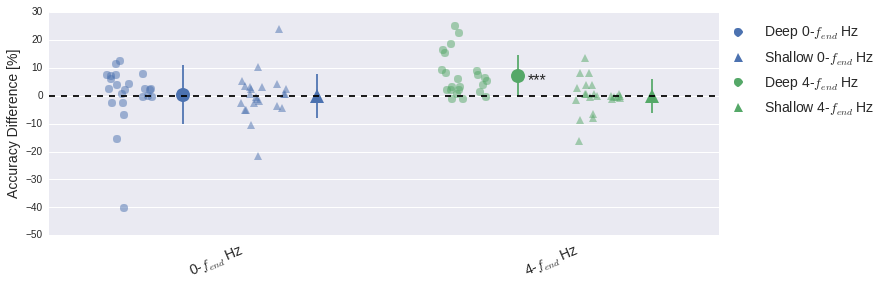

In [282]:
from matplotlib.lines import Line2D
rng = RandomState(39884934)
plt.figure(figsize=(12,4))
rands = rng.randn(23) #rng.randn(len(diffs))
offset = 0
for freq in ('>0', '>4'):
    for net in ('deep5', 'shallow'):
        this_row = df_cnt_epo[(df_cnt_epo.dataset == 'combined') &
                             (df_cnt_epo.freq == freq) &
                             (df_cnt_epo.net == net)]
        label = 'dummy'
        if net == 'deep5':
            marker = 'o'
        else:
            assert net == 'shallow'
            marker = '^'
        if '0-4' == freq:
            color = seaborn.color_palette()[3]
        elif '>0' == freq:
            color = seaborn.color_palette()[0]
        elif '>4' == freq:
            color = seaborn.color_palette()[1]
        


        cnt_test = this_row['test_cnt_subjects'][0]
        epo_test = this_row['test_epo_subjects'][0]
        diffs = cnt_test - epo_test
        # try plotting ours and bcic with different marker sizes, quite hacky(first 14 shouldbe ours)
        # not doing anymore
        assert clean_trial_sample
        plt.plot(rands[:14] * 0.05 + offset - 0.2,
                diffs[:14], color=color, marker=marker, alpha=0.5, linestyle='None',
                markersize=8) #markersize 8
        plt.plot(rands[14:] * 0.05 + offset - 0.2,
                diffs[14:], color=color, marker=marker, alpha=0.5, linestyle='None',
                markersize=8)
        plt.errorbar(offset, this_row['diff'][0], color=color,
                     yerr=this_row['std'][0], marker=marker,
                    markersize=14, label=label)

        if this_row['wilc'][0] < 0.05:
            if this_row['wilc'][0] < 0.001:
                signicance_str = '***'
            elif this_row['wilc'][0] < 0.01:
                signicance_str = '**'
            else:
                signicance_str = '*'
            plt.annotate(
                signicance_str, xy=(offset, this_row['diff'][0]), xytext=(10, -4), fontsize=16,
                    textcoords='offset points', ha = 'left', va = 'center',)

        offset += 0.5
    offset += 0.25
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(0.125,3,1.25), ('0-$f_{end}$ Hz', '4-$f_{end}$ Hz'), rotation=23,
          fontsize=14)
plt.xlim(-0.5,2.)
plt.grid('off', axis='x')
plt.ylabel('Accuracy Difference [%]', fontsize=14)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
# recreate  with empty line, only marker
handles = [Line2D([0], [0], color=h[0].get_color(), marker=h[0].get_marker(),
    markersize=9, linewidth=0) for h in handles]
ax.legend(handles, ('Deep 0-$f_{end}$ Hz', 'Shallow 0-$f_{end}$ Hz',
                          'Deep 4-$f_{end}$ Hz', 'Shallow 4-$f_{end}$ Hz'), 
          bbox_to_anchor=(1.25,1),
         fontsize=14)
None

In [279]:
rands[:14] * 0.05 + offset - 0.2

array([ 2.38011495,  2.23084723,  2.36908686,  2.25299595,  2.35647233,
        2.24818667,  2.23292439,  2.25187175,  2.26534977,  2.27029029,
        2.28390928,  2.29571638,  2.37617808,  2.35049259])

In [281]:
rands[14:] * 0.05 + offset - 0.2

array([ 2.24970836,  2.27988348,  2.21527113,  2.22883979,  2.27888518,
        2.22080228,  2.3481273 ,  2.27471182,  2.38211781])

### Modification Experiments

In [92]:
clean_mod_compare = True
df_mod = pd.DataFrame()
shallow_variants = [
                   ('No Dropout', lambda df: no_drop(yes_bnorm(df))),
                   ('No Batch Norm', lambda df: yes_drop(no_bnorm(df))),
                   ('No Dropout No Batch Norm', lambda df: no_drop(no_bnorm(df))),
                   ('No Split 1st Layer', no_split_first_layer),
                   ('No Tied Loss', no_tied_loss),
                   ('Sqrt instead of log', square_mean_sqrt),
                   ('Elu Max', elu_max_shallow),
                   ('Elu Mean', elu_mean_shallow),]

deep_variants = [
                   ('No Dropout', lambda df: tied_loss(no_drop(yes_bnorm(df)))),
                   ('No Batch Norm', lambda df: tied_loss(split_first_layer(yes_drop(no_bnorm(df))))),
                   ('No Dropout No Batch Norm', lambda df: tied_loss(
                        single_time_convs(elu_nonlins(no_drop(no_bnorm(df)))))),
                   ('No Split 1st Layer', no_split_first_layer),
                   ('No Tied Loss', lambda df: no_tied_loss(
                        single_time_convs(yes_drop(yes_bnorm(elu_nonlins(df)))))),
                   ('ReLU', lambda df: relu_nonlins(yes_bnorm(df))),
                   ('Log(Mean(Square)) first', square_mean_first),
                   ('Log(Max(Square)) first', square_max_first),
                   ('6x1+6x1 convs', double_time_convs),]

for dataset in 'bcic', 'ours', 'combined':
    for net in 'shallow', 'deep5':
        if net == 'shallow':
            variants = shallow_variants
        else:
            assert net == 'deep5'
            variants = deep_variants
        if dataset == 'bcic' and net == 'shallow':
            df_compare = df_shallow_cnt_bcic
        elif dataset == 'bcic' and net == 'deep5':
            df_compare = df_deep_cnt_bcic
        elif dataset == 'ours' and net == 'shallow':
            df_compare = df_shallow_cnt_ours
        elif dataset == 'ours' and net == 'deep5':
            df_compare = df_deep_cnt_ours
        elif dataset == 'combined' and net == 'shallow':
            df_compare = (df_shallow_cnt_bcic, df_shallow_cnt_ours)
        elif dataset == 'combined' and net == 'deep5':
            df_compare = (df_deep_cnt_bcic, df_deep_cnt_ours)
        else:
            raise ValueError("unknown combination")
            
        if clean_mod_compare:
            if dataset != 'combined':
                df_compare = clean_datasets(df_compare)
            else:
                assert dataset == 'combined'
                df_compare = [clean_datasets(df_set) for df_set in df_compare]
        if dataset != 'combined':
            df_compare = df_compare[df_compare.max_increasing_epochs == 80]
        else:
            assert dataset == 'combined'
            df_compare = [df_set[df_set.max_increasing_epochs == 80] for df_set in df_compare]
            
        for freq in '>0', '>4':
            if dataset in ('bcic', 'ours'):
                df_baseline = all_df[(all_df.net == net)&
                                    (all_df.freq == freq) &
                                    (all_df.dataset == dataset) &
                                    (all_df.train_type == 'cnt') &
                                    (all_df.clean == clean_mod_compare)]
            else:
                df_baseline =  all_df[(all_df.net == net)&
                                    (all_df.freq == freq) &
                                    (all_df.train_type == 'cnt') &
                                    (all_df.clean == clean_mod_compare)]
                
            # new, if needed
            #df_compare = restrict_or_missing_col(df_compare, max_abs_threshold=800)
            for var_name, var_func in variants:
                if freq == '>0' and dataset in ('bcic', 'ours'):
                    df_var = var_func(above_0(df_compare))
                elif dataset in ('bcic', 'ours'):
                    assert freq == '>4'
                    df_var = var_func(above_4(df_compare))
                elif freq == '>0' and dataset == 'combined':
                    df_var_1 = var_func(above_0(df_compare[0]))
                    df_var_2 = var_func(above_0(df_compare[1]))
                    df_var = pd.concat((df_var_1, df_var_2))
                elif freq == '>4' and dataset == 'combined':
                    df_var_1 = var_func(above_4(df_compare[0]))
                    df_var_2 = var_func(above_4(df_compare[1]))
                    df_var = pd.concat((df_var_1, df_var_2))
                if var_name != 'No Tied Loss':
                    df_var = tied_loss(df_var)
                if dataset == 'bcic':
                    assert len(df_var) == 9
                elif dataset == 'ours':
                    assert len(df_var) == 20 or (len(df_var) == 14 and clean_mod_compare)
                else:
                    assert dataset == 'combined'
                    assert len(df_var) == 29 or (len(df_var) == 23 and clean_mod_compare)
                assert len(df_var) == len(df_baseline), (
                    "Expect length of variant {:d} to be same as length of baseline {:d}".format(
                    len(df_var), len(df_baseline)))
                df_merged = df_baseline.merge(df_var, on='dataset_filename', suffixes=('_base','_var'))
                # not really necessary to sort, just to make sure 
                df_merged = df_merged.sort_values(by='dataset_filename')
                test_baseline = np.array(df_merged.test_base)
                test_variant = np.array(df_merged.test_var)
                this_df_mod = pd.DataFrame()
                this_df_mod['dataset'] = [dataset]
                this_df_mod['net'] = [net]
                this_df_mod['freq'] = [freq]
                this_df_mod['variant'] = [var_name]
                this_df_mod['test'] = [np.mean(df_merged.test_var)]
                this_df_mod['diff'] = [np.mean(df_merged.test_var - df_merged.test_base)]
                this_df_mod['std'] = [np.std(df_merged.test_var - df_merged.test_base)]
                this_df_mod['stderr'] = [np.std(df_merged.test_var - df_merged.test_base) / 
                                         np.sqrt(len(df_merged))]
                this_df_mod['test_baseline_subjects'] = [test_baseline]
                this_df_mod['test_variant_subjects'] = [test_variant]
                
                add_p_vals_to_df_row(this_df_mod, test_variant, 
                                     test_baseline, n_diffs_for_large=2**17)
                df_mod = pd.concat((df_mod, this_df_mod))

In [93]:
common_variants = np.intersect1d(zip(*deep_variants)[0], zip(*shallow_variants)[0])

other_shallow_vars = np.setdiff1d(zip(*shallow_variants)[0], zip(*deep_variants)[0])[::-1]
other_deep_vars = np.setdiff1d(zip(*deep_variants)[0], zip(*shallow_variants)[0])[::-1]
all_variants = np.concatenate((common_variants, other_shallow_vars,other_deep_vars))

uncommon_variants = np.concatenate((other_shallow_vars, other_deep_vars))

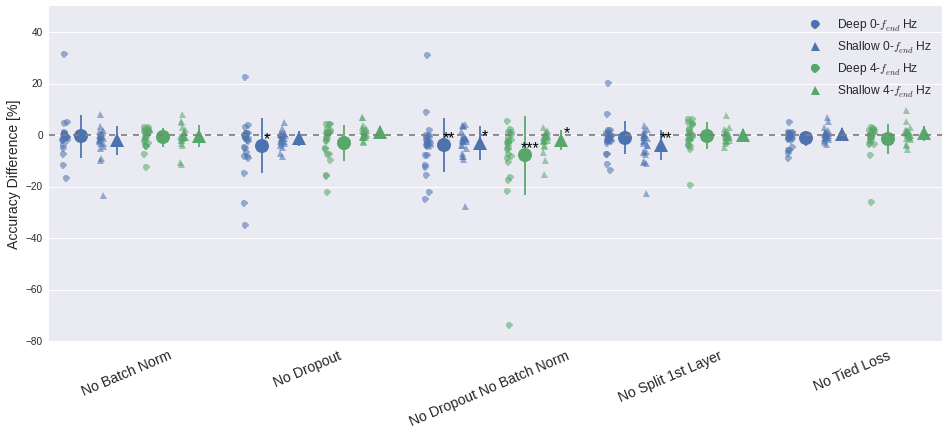

In [313]:
plt.figure(figsize=(16,6))
offset = 0
for i_var, var_name in enumerate(common_variants):
    for freq in [">0", ">4"]:
        for net in 'deep5', 'shallow':
            markersize = 10
            if net == 'deep5':
                marker = 'o'
            else:
                assert net == 'shallow'
                marker = '^'
            if '>0' == freq:
                color = seaborn.color_palette()[0]
            elif '>4' == freq:
                color = seaborn.color_palette()[1]
            this_var = df_mod[(df_mod.variant == var_name) &
                             (df_mod.net == net) & 
                             (df_mod.freq == freq) & 
                             (df_mod.dataset == 'combined')]
            
            baseline_test = this_var.test_baseline_subjects[0]
            var_test = this_var.test_variant_subjects[0]
            diffs = var_test - baseline_test
            assert clean_mod_compare, "Else change logic below with plotting bcic and hgd"
            # could merge
            plt.plot(rands[:14] * 0.03 + offset - 0.36,
                    diffs[:14], color=color, marker=marker, alpha=0.55, linestyle='None',
                    markersize=7) #markersize 8
            plt.plot(rands[14:] * 0.03 + offset - 0.36,
                    diffs[14:], color=color, marker=marker, alpha=0.55, linestyle='None',
                    markersize=7)
            plt.errorbar(offset, this_var['diff'][0], color=color,
                         yerr=this_var['std'][0], marker=marker,
                        markersize=14, label='dummy')
            if this_var['wilc'][0] < 0.05:
                significance_str = '*'
                if this_var['wilc'][0] < 0.01:
                    significance_str = '**'
                if this_var['wilc'][0] < 0.001:
                    significance_str = '***'
                plt.annotate(
                        significance_str, xy = (offset, this_var['diff'][0]),
                    xytext = (5, 15), fontsize=16,
                        textcoords = 'offset points', ha = 'center', va = 'top',
                color='black')
            offset += 0.8
        offset += 0.2
    offset += 0.4
#plt.ylim(-20,10)
plt.axhline(y=0, color='grey', linestyle='dashed')

plt.xticks(np.arange(1.,21,4), common_variants, rotation=23, fontsize=14)
plt.grid('off', axis='x')
#plt.xlim(-0.5, plt.xlim()[1]+0.5)
plt.ylabel('Accuracy Difference [%]', fontsize=14)
plt.xlim(-0.7,plt.xlim()[1]-1)
plt.ylim(-80,50)

# get handles
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
# recreate  with empty line, only marker
handles = [Line2D([0], [0], color=h[0].get_color(), marker=h[0].get_marker(),
                 markersize=9, linewidth=0) for h in handles]
# use them in the legend
ax.legend(handles[:4], ('Deep 0-$f_{end}$ Hz', 'Shallow 0-$f_{end}$ Hz',
                        'Deep 4-$f_{end}$ Hz','Shallow 4-$f_{end}$ Hz'), 
          bbox_to_anchor=(1,1),
         fontsize=12)


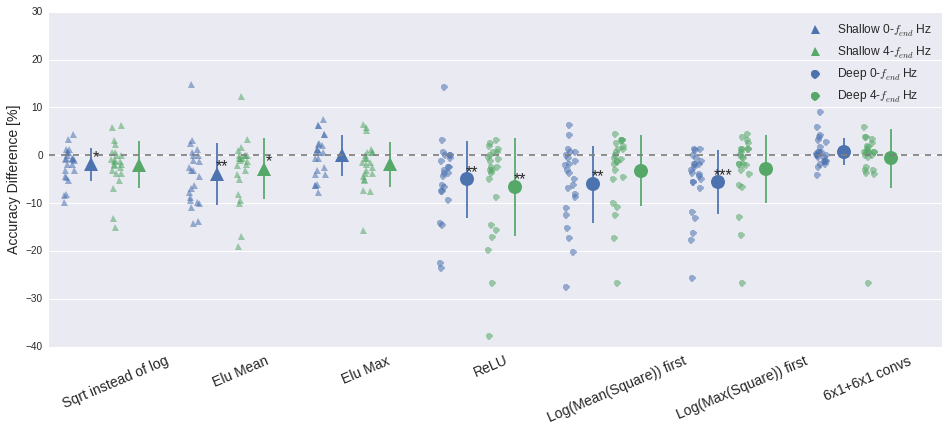

In [312]:
plt.figure(figsize=(16,6))
offset = 0
for i_var, var_name in enumerate(uncommon_variants):
    for freq in [">0", ">4"]:
        for net in 'shallow', 'deep5':
            if net == 'shallow' and var_name in other_deep_vars:
                continue
            if net == 'deep5' and var_name in other_shallow_vars:
                continue
            markersize = 10
            if net == 'deep5':
                marker = 'o'
            else:
                assert net == 'shallow'
                marker = '^'
            if '>0' == freq:
                color = seaborn.color_palette()[0]
            elif '>4' == freq:
                color = seaborn.color_palette()[1]
            this_var = df_mod[(df_mod.variant == var_name) &
                             (df_mod.net == net) & 
                             (df_mod.freq == freq) & 
                             (df_mod.dataset == 'combined')]
            
            baseline_test = this_var.test_baseline_subjects[0]
            var_test = this_var.test_variant_subjects[0]
            diffs = var_test - baseline_test
            assert clean_mod_compare
            plt.plot(rands[:14] * 0.05 + offset - 0.375,
                    diffs[:14], color=color, marker=marker, alpha=0.55, linestyle='None',
                    markersize=7) #markersize 8
            plt.plot(rands[14:] * 0.05 + offset - 0.375,
                    diffs[14:], color=color, marker=marker, alpha=0.55, linestyle='None',
                    markersize=7)
            plt.errorbar(offset, this_var['diff'][0], color=color,
                         yerr=this_var['std'][0], marker=marker,
                        markersize=14, label='dummy')
            if this_var['wilc'][0] < 0.05:
                significance_str = '*'
                if this_var['wilc'][0] < 0.01:
                    significance_str = '**'
                if this_var['wilc'][0] < 0.001:
                    significance_str = '***'
                plt.annotate(
                        significance_str, xy = (offset, this_var['diff'][0]),
                    xytext = (5, 15), fontsize=16,
                        textcoords = 'offset points', ha = 'center', va = 'top',)
            offset += 0.6
        offset += 0.2
    offset += 0.5
#plt.ylim(-20,10)
plt.axhline(y=0, color='grey', linestyle='dashed')

plt.xticks(np.arange(0.4,15,2.1), uncommon_variants, rotation=23,
          fontsize=14)
plt.grid('off', axis='x')
plt.xlim(-0.7, plt.xlim()[1]+0.25)
plt.ylabel('Accuracy Difference [%]', fontsize=14)
plt.ylim(-40,30)
# get handles
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
# recreate  with empty line, only marker
handles = [Line2D([0], [0], color=h[0].get_color(), marker=h[0].get_marker(),
                 markersize=9, linewidth=0) for h in handles]
# use them in the legend
ax.legend(handles[:2] + handles[6:8], ('Shallow 0-$f_{end}$ Hz', 'Shallow 4-$f_{end}$ Hz',
                                       'Deep 0-$f_{end}$ Hz','Deep 4-$f_{end}$ Hz'), 
          bbox_to_anchor=(1.,1),
         fontsize=12)


## FFT Net

In [96]:
df_deep_epo_fft_bcic = load_data_frame('data/models/paper/bci-competition/epo/deep-fft/', shorten_headers=False)
df_deep_epo_fft_ours = load_data_frame('data/models/paper/ours/epo/deep-fft/', shorten_headers=False)
only_clean_sets = True
if only_clean_sets:
    df_deep_epo_fft_ours = clean_datasets(df_deep_epo_fft_ours)

In [97]:
all_df_fft = pd.DataFrame()
all_df_fft_comp = pd.DataFrame()

dff = df_deep_epo_fft_bcic
main_csp_bcic = restrict_or_unset(csp_above_0(df_csp_bcic), standardize=False,
                                                                   standardize_cnt=False,
                                 trial_start=500)

dff = dff[(dff.num_filters_time == 25) & 
         (dff.preprocessor == 'null') &
         (dff.filter_length_2 == 3) &
         ((dff.layers == 'deep_fft_net_spat_time_freq')) &
         (dff.frequency_end != 36) &
         (dff.frequency_start != 4) &
         (dff.include_phase == False) &
         (dff.square_amplitude == False)]

dff = above_0(dff)

all_df_fft = pd.concat((all_df_fft, dff))

for freq in ['0-40', '0-124']:
    if freq == '0-40':
        this_dfn = dff[dff.frequency_end == 40]
        df_comp = compare_net_csp(this_dfn, main_csp_bcic,
                                  'fft','0-40','bcic',)
    else:
        this_dfn = dff[dff.frequency_end == 'null']
        assert freq == '0-124'
        df_comp = compare_net_csp(this_dfn, main_csp_bcic,
                                  'fft','0-124','bcic')
    all_df_fft_comp = pd.concat((all_df_fft_comp, df_comp))


        
dataset_averaged_frame(remove_columns_with_same_value(dff))

time                    test        train     
                               len    tmean     tstd  mean   std   mean  std
frequency_end frequency_start                                               
40            0                  9 00:02:05 00:00:25  54.6  15.6   99.7  0.7
null          null               9 00:03:16 00:00:36  45.4  14.7  100.0  0.0

In [98]:
dff = df_deep_epo_fft_ours
dff = dff[(dff.include_phase == False) & (dff.square_amplitude == False)]
dataset_averaged_frame(remove_columns_with_same_value(dff))

time                    \
                                                      len    tmean     tstd   
low_cut_hz frequency_end high_cut_hz frequency_start                          
0          40            4           0                 14 00:06:49 00:02:32   
                         null        0                 14 00:05:00 00:01:15   
           null          4           null              14 00:12:41 00:04:22   
                         null        null              14 00:09:38 00:03:10   
4          40            null        0                 14 00:05:21 00:01:21   
           null          null        null              14 00:09:32 00:02:01   

                                                      test       train       
                                                      mean  std   mean  std  
low_cut_hz frequency_end high_cut_hz frequency_start                         
0          40            4           0                79.3  8.8   99.5  1.4  
                         null        0                81.5  8.2   99.5  1.2  
           null          4           null             79.2  9.4   99.0  1.6  
                         null        null             84.5  9.6   99.9  0.5  
4          40            null        0                80.0  9.9   99.9  0.4  
           null          null        null             85.8  9.0  100.0  0.0

In [99]:
dff = df_deep_epo_fft_ours

main_csp_ours = restrict_or_unset(clean_datasets(csp_above_0(df_csp_ours)), standardize=False,
                                                                   standardize_cnt=False,
                                 trial_start=500, max_abs_threshold=800)

dff = dff[(dff.num_filters_time == 25) & 
         (dff.preprocessor == 'null') &
         (dff.filter_length_2 == 3) &
         ((dff.layers == 'deep_fft_net_spat_time_freq') | (dff.layers == 'seperated_linear')) &
         (dff.include_phase == False) &
         (dff.square_amplitude == False)]

dff = above_0(dff)

all_df_fft = pd.concat((all_df_fft, dff))

for freq in ['0-40', '0-124']:
    if freq == '0-40':
        this_dfn = dff[dff.frequency_end == 40]
        df_comp = compare_net_csp(this_dfn, main_csp_ours,
                                  'fft','0-40','ours',)
    else:
        this_dfn = dff[dff.frequency_end == 'null']
        assert freq == '0-124'
        df_comp = compare_net_csp(this_dfn, main_csp_ours,
                                  'fft','0-124','ours')
    all_df_fft_comp = pd.concat((all_df_fft_comp, df_comp))
    
dataset_averaged_frame(remove_columns_with_same_value(dff))

time                    test      train     
                               len    tmean     tstd  mean  std  mean  std
frequency_end frequency_start                                             
40            0                 14 00:05:00 00:01:15  81.5  8.2  99.5  1.2
null          null              14 00:09:38 00:03:10  84.5  9.6  99.9  0.5

#### add combined

In [100]:
for freq in ['0-40', '0-124']:
    if freq == '0-40':
        this_dfn = all_df_fft[all_df_fft.frequency_end == 40]
        df_comp = compare_net_csp(this_dfn, 
                                  csp_above_0(pd.concat((main_csp_ours, main_csp_bcic))),
                                  'fft', '0-40', 'combined',)
    else:
        this_dfn = all_df_fft[all_df_fft.frequency_end == 'null']
        assert freq == '0-124'
        df_comp = compare_net_csp(this_dfn,
                                  csp_above_0(pd.concat((main_csp_ours, main_csp_bcic))),
                                  'fft', '0-124', 'combined')
    all_df_fft_comp = pd.concat((all_df_fft_comp, df_comp))

In [101]:
all_df_fft_comp

,name,freq,dataset,test_net,diff,rand,wilc,sign,time_net
0,fft,0-40,bcic,54.6,-13.3,1.171875e-02,1.171875e-02,0.039062,00:02:05
0,fft,0-124,bcic,45.4,-22.6,3.906250e-03,3.906250e-03,0.003906,00:03:16
0,fft,0-40,ours,81.5,-9.6,2.441406e-04,2.441406e-04,0.001831,00:05:00
0,fft,0-124,ours,84.5,-6.6,3.662109e-04,3.662109e-04,0.001831,00:09:38
0,fft,0-40,combined,71.0,-11.1,9.536743e-07,1.668930e-06,0.000066,00:03:51
0,fft,0-124,combined,69.2,-12.9,9.536743e-07,7.152557e-07,0.000006,00:07:09


In [102]:
remove_columns_with_same_value(dff).iloc[0:2]

,frequency_end,frequency_start,test_filename,dataset_filename,time,test,train
36,40,0,data/BBCI-only-last-runs/BhNoMoSc1S001R13_ds10...,data/BBCI-without-last-runs/BhNoMoSc1S001R01_d...,00:04:45,88.125,100
40,null,null,data/BBCI-only-last-runs/BhNoMoSc1S001R13_ds10...,data/BBCI-without-last-runs/BhNoMoSc1S001R01_d...,00:11:33,95.625,100


In [103]:
from braindecode.experiments.load import load_exp_and_model
from braindecode.veganlasagne.layer_util import print_layers
_, fft_model = load_exp_and_model('data/models/paper/ours/epo/deep-fft/40')

print_layers(fft_model)

 0 InputLayer                                                         [None, 44, 84, 63]
 1 DropoutLayer                                                      
 2 Conv2DLayer              1x1                                       (None, 25, 84, 63)
 3 Conv2DLayer              3x1                                      
 4 Conv2DLayer              1x63                                      (None, 25, 84, 1)
 5 BatchNormLayer                                     elu            
 6 Pool2DLayer              3x1 ::3 ::3               max             (None, 25, 28, 1)
 7 NonlinearityLayer                                                 
 8 DropoutLayer                                                      
 9 Conv2DLayer              3x1                                       (None, 50, 28, 1)
10 BatchNormLayer                                     elu            
11 Pool2DLayer              3x1 ::3 ::3               max             (None, 50, 10, 1)
12 NonlinearityLayer                              

/home/schirrmr/.local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [104]:
import lasagne
lasagne.layers.get_all_layers(fft_model)[3].pad

(1, 0)

### Residual Net

In [105]:
exp, model = load_exp_and_model('data/models/paper/ours/cnt/resnet/2')

INFO:braindecode.experiments.experiment:Setting n_sample preds automatically to 424
INFO:braindecode.experiments.experiment:Input window length is 577
INFO:braindecode.experiments.experiment:Setting n_sample preds automatically to 424
INFO:braindecode.experiments.experiment:Input window length is 577


In [106]:
from braindecode.veganlasagne.layers import get_n_sample_preds

In [223]:
df_resnet_bcic_old = load_data_frame('data/models/paper/before-trial-start-reruns/bci-competition/cnt/resnet/', params=dict(whisker_percent=None),
                            shorten_headers=False)

In [249]:
old_df = df_resnet_bcic_old.copy()
old_df = the_df[(old_df.batch_modifier == 'null') & 
                (old_df.loss_expression == 'tied_neighbours_decay') &
               (old_df.add_after_nonlin == '-') &
               (old_df.split_first_layer == True)]
dataset_averaged_frame(remove_columns_with_same_value(old_df))

time                    test       train    
   len    tmean     tstd  mean   std  mean std
0    9 01:20:54 00:18:46  65.9  13.5   100   0

In [250]:
new_df = df_resnet_bcic[(df_resnet_bcic.low_cut_hz == 0) &
                       (df_resnet_bcic.high_cut_hz == 38)]
dataset_averaged_frame(remove_columns_with_same_value(new_df))

time                    test     train     
   len    tmean     tstd  mean std  mean  std
0    9 01:22:36 00:17:37  61.8  13  99.1  2.6

In [252]:
len(pd.concat([new_df, old_df]))

18

In [261]:
new_row = new_df.iloc[0]
old_row = old_df.iloc[0]

In [262]:
np.setdiff1d(new_row.index, old_row.index)

array(['low_cut_hz', 'max_abs_threshold', 'rejection_max_abs_ival'], dtype=object)

In [263]:
np.setdiff1d(old_row.index, new_row.index)

array(['low_cut_off_hz'], dtype=object)

In [265]:
both_indices = np.intersect1d(old_row.index, new_row.index)

In [270]:
for key in both_indices:
    if new_row[key] != old_row[key]:
        print key
        print("new", new_row[key])
        print("old", old_row[key])

add_after_nonlin
('new', False)
('old', '-')
cnt_preprocessors
('new', 'resample_bandpass_standardize')
('old', 'resample_highpass_standardize')
final_nonlin
('new', 'log_softmax')
('old', 'safe_softmax')
high_cut_hz
('new', 38)
('old', '-')
loss_expression
('new', 'safe_tied_neighbours_decay')
('old', 'tied_neighbours_decay')
max_epochs
('new', 800)
('old', 500)
reduction_method
('new', 'conv')
('old', '-')
reduction_pool_mode
('new', 'null')
('old', '-')
test
('new', 68.75)
('old', 71.527777777777786)
test_cleaner
('new', 'max_abs_cleaner')
('old', 'no_cleaner')
test_sample
('new', 64.602168501048212)
('old', 66.44269195492663)
time
('new', Timedelta('0 days 01:30:07'))
('old', Timedelta('0 days 01:07:43'))
train_cleaner
('new', 'max_abs_cleaner')
('old', 'no_cleaner')
train_sample
('new', 99.902957940251568)
('old', 98.302378144654085)


In [303]:
df_resnet_bcic = load_data_frame('data/models/paper/bci-competition/cnt/resnet/', params=dict(whisker_percent=None),
                            shorten_headers=False)
assert np.all(df_resnet_bcic.max_abs_threshold == 800)
assert np.all(df_resnet_bcic.trial_start == 1500)
df_resnet_bcic = df_resnet_bcic[df_resnet_bcic.loss_expression == 'tied_neighbours_decay']
averaged_frame = dataset_averaged_frame(remove_columns_with_same_value(df_resnet_bcic))
averaged_frame

time                    test       train     
            len    tmean     tstd  mean   std  mean  std
low_cut_hz                                              
0             9 01:21:21 00:18:04  67.7  12.9   100  0.0
4             9 01:13:19 00:07:36  60.8  17.5   100  0.1

In [275]:
df_resnet_ours_old = load_data_frame('data/models/paper/before-trial-start-reruns/ours/cnt/resnet/', params=dict(whisker_percent=None),
                            shorten_headers=False)

In [277]:
dataset_averaged_frame(remove_columns_with_same_value(clean_datasets(df_resnet_ours_old)))

time           \
                                                          len    tmean   
high_cut_hz low_cut_off_hz cnt_preprocessors                             
4           -              resample_lowpass_standardize    14 03:45:10   
-           4              resample_highpass_standardize   14 04:14:31   
            null           resample_highpass_standardize   14 03:30:31   

                                                                   test        \
                                                             tstd  mean   std   
high_cut_hz low_cut_off_hz cnt_preprocessors                                    
4           -              resample_lowpass_standardize  01:27:09  71.4  13.7   
-           4              resample_highpass_standardize 01:48:21  87.0  11.0   
            null           resample_highpass_standardize 01:06:04  88.9   6.8   

                                                         train       
                                                          mean  std  
high_cut_hz low_cut_off_hz cnt_preprocessors                         
4           -              resample_lowpass_standardize   99.9  0.1  
-           4              resample_highpass_standardize  99.8  0.8  
            null           resample_highpass_standardize  99.9  0.2

In [111]:
def no_bp_meaner(df):
    return df[df.batch_modifier != 'bp_meaner']

In [304]:
compare_net_csp(above_0(df_resnet_bcic),
                all_df[(all_df.dataset == 'bcic') & (all_df.clean ==True) &
                       (all_df.net == 'deep5') & (all_df.train_type == 'cnt') &
                             (all_df.max_abs_threshold == 800) &
                             (all_df.trial_start == -500) &
                             (all_df.freq == ">0")], 
                'resnet','>0','bcic')

,name,freq,dataset,test_net,diff,rand,wilc,sign,time_net
0,resnet,>0,bcic,67.7,-3.2,0.480469,0.128906,0.039062,01:21:21


In [305]:
clean_resnet = True
df_resnet_ours = load_data_frame('data/models/paper/ours/cnt/resnet/', params=dict(whisker_percent=None),
                            shorten_headers=False)
df_resnet_ours = df_resnet_ours[df_resnet_ours.loss_expression == 'tied_neighbours_decay']
assert np.all(df_resnet_ours.max_abs_threshold == 800)
assert np.all(df_resnet_ours.trial_start == 1500)
if clean_resnet:
    df_resnet_ours = clean_datasets(df_resnet_ours)

averaged_frame = dataset_averaged_frame(remove_columns_with_same_value(df_resnet_ours))
averaged_frame

time                    test       train     
            len    tmean     tstd  mean   std  mean  std
low_cut_hz                                              
0            14 03:13:04 01:03:33  88.9   6.6  99.6  0.7
4            14 03:52:38 01:31:35  89.8  10.3  99.9  0.4

In [306]:
compare_net_csp(above_0(df_resnet_ours),
                all_df[(all_df.dataset == 'ours') & (all_df.clean ==True) &
                       (all_df.net == 'deep5') & (all_df.train_type == 'cnt') &
                             (all_df.max_abs_threshold == 800) &
                             (all_df.trial_start == -500) &
                             (all_df.freq == ">0")],
                'resnet','>0','ours')

,name,freq,dataset,test_net,diff,rand,wilc,sign,time_net
0,resnet,>0,ours,88.9,-3.5,0.065674,0.020264,0.057373,03:13:04


In [308]:
compare_net_csp(pd.concat((above_0(df_resnet_bcic), above_0(df_resnet_ours))),
                pd.concat((all_df[(all_df.dataset == 'bcic') & (all_df.clean ==True) &
                       (all_df.net == 'deep5') & (all_df.train_type == 'cnt') &
                             (all_df.max_abs_threshold == 800) &
                             (all_df.trial_start == -500) &
                             (all_df.freq == ">0")],
            all_df[(all_df.dataset == 'ours') & (all_df.clean ==True) &
                       (all_df.net == 'deep5') & (all_df.train_type == 'cnt') &
                             (all_df.max_abs_threshold == 800) &
                             (all_df.trial_start == -500) &
                             (all_df.freq == ">0")])),
                'resnet','>0','combined', max_n_p_vals=3)

,name,freq,dataset,test_net,diff,rand,wilc,sign,time_net
0,resnet,>0,combined,80.6,-3.4,0.125,0.003874,0.002599,02:29:21


### Training TImes

In [117]:

df_csp_ours = load_data_frame('data/models/paper/ours/csp/', shorten_headers=False)
df_csp_bcic = load_data_frame('data/models/paper/bci-competition/csp/', shorten_headers=False)

In [118]:
from IPython.display import display_html, display, HTML
from braindecode.analysis.pandas_util import dataset_averaged_frame, remove_columns_with_same_value, load_data_frame

In [119]:
def display_bci_competition_times(folder):
    display(HTML("<h5>Shallow</h5>"))
    display_html(dataset_averaged_frame(remove_columns_with_same_value(
        clean_datasets(load_data_frame('data/models/paper/bci-competition/cnt/shallow/{:s}/'.format(folder),
                                  shorten_headers=False)))))
    display(HTML("<h5>Deep</h5>"))
    display_html(dataset_averaged_frame(remove_columns_with_same_value(
        clean_datasets(load_data_frame('data/models/paper/bci-competition/cnt/deep4/{:s}/'.format(folder),
                                  shorten_headers=False)))))
    
def display_ours_times(folder):
    display(HTML("<h5>Shallow</h5>"))
    display_html(dataset_averaged_frame(remove_columns_with_same_value(
        clean_datasets(load_data_frame('data/models/paper/ours-before-cz-0/cnt/shallow/{:s}/'.format(folder),
                                  shorten_headers=False)))))
    display(HTML("<h5>Deep</h5>"))
    display_html(dataset_averaged_frame(remove_columns_with_same_value(
        clean_datasets(load_data_frame('data/models/paper/ours-before-cz-0/cnt/deep4/{:s}/'.format(folder),
                                  shorten_headers=False)))))

#### BCI Competition

In [120]:
dataset_averaged_frame(remove_columns_with_same_value(csp_above_0(df_csp_bcic)))

time                    test       train     
             len    tmean     tstd  mean   std  mean  std
trial_start                                              
-500           9 00:00:54 00:00:03  57.8  10.7  91.2  8.1
 0             9 00:00:50 00:00:01  63.3  14.7  92.8  6.0
 500           9 00:00:48 00:00:01  68.0  15.1  94.6  3.2

In [121]:
display_bci_competition_times('traintime-rz')

IndexError: list index out of range

In [ ]:
display_bci_competition_times('traintime-tf')

#### Ours

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(csp_above_0(df_csp_ours)))

In [ ]:
dataset_averaged_frame(all_df[(all_df.dataset =='ours') &
                             (all_df.clean == False)
                             ])

In [ ]:
display_ours_times('traintime-rz')

In [ ]:
display_ours_times('traintime-tf')

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(
    clean_datasets(load_data_frame('data/models/paper/ours/cnt/shallow/traintime-rz/',
                                  shorten_headers=False))))

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(
    clean_datasets(load_data_frame('data/models/paper/ours/cnt/deep4/traintime-rz/',
                                  shorten_headers=False))))

### Old trianing times, unclear which queue

In [ ]:
dfn = restrict(shallow_cnt_default(tied_loss(above_0(square_shallow(df_shallow_cnt_bcic)))), drop_p='-')
dataset_averaged_frame(remove_columns_with_same_value(dfn))

In [ ]:
dfn = no_bp_meaner(tied_loss(deep_5_new_default(above_0(elu_deep_5(df_deep_cnt_bcic)))))
dataset_averaged_frame(remove_columns_with_same_value(dfn))

In [ ]:
dfn = restrict(shallow_cnt_default(tied_loss(above_0(square_shallow(df_shallow_cnt_ours)))), drop_p='-', tag='repl')
dataset_averaged_frame(remove_columns_with_same_value(dfn))

In [ ]:
dfn = no_bp_meaner(tied_loss(deep_5_new_default(above_0(elu_deep_5(df_deep_cnt_ours)))))
dataset_averaged_frame(remove_columns_with_same_value(dfn))

### New ours Run

In [ ]:
remove_columns_with_same_value(load_data_frame('data/models/paper/ours-before-cz-0/csp/car/'))

In [ ]:
df_deep_ours_new = load_data_frame('data/models/paper/ours/cnt/deep5/', shorten_headers=False)

In [ ]:
avgd = dataset_averaged_frame(remove_columns_with_same_value(df_deep_ours_new))

In [ ]:
df_shallow_ours_new = load_data_frame('data/models/paper/ours/cnt/shallow/', shorten_headers=False)

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(df_shallow_ours_new))

In [ ]:
def strfdelta(tdelta, fmt):
    """For numpy timedelta, modified from
    http://stackoverflow.com/a/8907269/1469195"""
    d = {"days": tdelta.astype('timedelta64[D]').astype(np.int32)}
    # only those seconds not absorbed by day
    seconds = tdelta.astype('timedelta64[s]').astype(np.int32) % (3600 * 24)
   
    d["hours"], rem = divmod(seconds, 3600)
    d["minutes"], d["seconds"] = divmod(rem, 60)
    return fmt.format(**d)

In [ ]:
time_lens = np.array(avgd['time', 'len'])
time_means = np.array(avgd['time', 'tmean'])

n_open_exps_per_variant = 20 - time_lens
n_open_exps = np.sum(n_open_exps_per_variant)
remaining_time_per_variant = n_open_exps_per_variant * time_means

avg_time_per_exp = np.sum(time_means * time_lens) / float(np.sum(time_lens))
total_time = n_open_exps * avg_time_per_exp
print strfdelta(np.sum(remaining_time_per_variant) / 14.0, "{days} days {hours}:{minutes}:{seconds}")

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(load_data_frame('data/models/paper/ours/epo/shallow//')))

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(load_data_frame('data/models/paper/ours/epo/deep4/')))

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(df_csp_ours))

In [ ]:
df_shallow_wanted = tied_loss(square_shallow(shallow_cnt_default(yes_drop(yes_bnorm(above_4(df_clean))))))

In [ ]:
df_shallow_wanted = remove_columns_with_same_value(df_shallow_wanted)

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(df_shallow_wanted))

In [ ]:
df_csp_wanted = remove_columns_with_same_value(csp_above_4(df_csp_ours_clean))

In [ ]:
dataset_averaged_frame(df_csp_wanted)

In [ ]:
compare_net_csp(df_shallow_wanted, df_csp_wanted,'shallow', '4', 'ours',with_csp_acc=True,with_std=True,
               with_std_error=True)

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(df_csp_ours_clean))

In [ ]:
df_clean = df_shallow_ours_new.copy()
df_csp_ours_clean = df_csp_ours.copy
for name in unclean_sets:
    df_clean = df_clean[np.logical_not(df_clean.dataset_filename.str.contains(name))]
    df_csp_ours_clean = df_csp_ours_clean[np.logical_not(df_csp_ours_clean.dataset_filename.str.contains(name))]
dataset_averaged_frame(remove_columns_with_same_value(df_clean))
    

In [ ]:

df_csp_ours = load_data_frame('data/models/paper/ours/csp/', shorten_headers=False)

In [ ]:
dataset_averaged_frame(remove_columns_with_same_value(df_csp_ours))

In [ ]:
df_clean_csp = df_csp_ours.copy()
for name in unclean_sets:
    df_clean_csp = df_clean_csp[np.logical_not(df_clean_csp.dataset_filename.str.contains(name))]
dataset_averaged_frame(remove_columns_with_same_value(df_clean_csp))
    

### Compare with more epochs

In [ ]:
param_keys

In [ ]:
df_ours = df_shallow_cnt_ours

param_keys = df_ours.columns

param_keys = set(param_keys) - set(['test', 'train', 'time', 'max_epochs', 'max_increasing_epochs'])

df_long = df_ours[df_ours.max_increasing_epochs == 160]
df_quick = df_ours[df_ours.max_increasing_epochs == 80]

df_merged = df_long.merge(df_quick, on=list(param_keys), suffixes=('_long', '_quick'))

plt.plot(df_merged.test_long - df_merged.test_quick)
plt.axhline(y=0, color='k')
print np.mean(df_merged.test_long - df_merged.test_quick)

In [ ]:
df_ours = df_deep_cnt_ours

param_keys = df_ours.columns

param_keys = set(param_keys) - set(['test', 'train', 'time', 'max_epochs', 'max_increasing_epochs'])

df_long = df_ours[df_ours.max_increasing_epochs == 160]
df_quick = df_ours[df_ours.max_increasing_epochs == 80]

df_merged = df_long.merge(df_quick, on=list(param_keys), suffixes=('_long', '_quick'))

plt.plot(df_merged.test_long - df_merged.test_quick)
plt.axhline(y=0, color='k')
print np.mean(df_merged.test_long - df_merged.test_quick)

### Vs different trials

In [ ]:
df_ours = df_shallow_cnt_ours

param_keys = df_ours.columns

param_keys = set(param_keys) - set(['test', 'train', 'time', 'max_epochs', 'max_increasing_epochs', 'trial_start'])

df_long = df_ours[df_ours.trial_start == 2000]
df_quick = df_ours[df_ours.max_increasing_epochs == 80]

df_merged = df_long.merge(df_quick, on=list(param_keys), suffixes=('_long', '_quick'))

plt.plot(df_merged.test_long - df_merged.test_quick)
plt.axhline(y=0, color='k')
print np.mean(df_merged.test_long - df_merged.test_quick)

In [ ]:
df_ours = df_deep_cnt_ours

param_keys = df_ours.columns

param_keys = set(param_keys) - set(['test', 'train', 'time', 'max_epochs', 'max_increasing_epochs', 'trial_start'])

df_long = df_ours[df_ours.trial_start == 2000]
df_quick = df_ours[df_ours.max_increasing_epochs == 80]

df_merged = df_long.merge(df_quick, on=list(param_keys), suffixes=('_long', '_quick'))

plt.plot(df_merged.test_long - df_merged.test_quick)
plt.axhline(y=0, color='k')
print np.mean(df_merged.test_long - df_merged.test_quick)

### BCI competition CSP with >0 Hz

In [ ]:

df_csp_bcic = load_data_frame('data/models/paper/bci-competition/csp/', shorten_headers=False)

In [ ]:
dfc = df_csp_bcic
dfc = dfc[dfc.min_freq == 1.0]
dataset_averaged_frame(remove_columns_with_same_value(dfc)).sort_values(('test', 'mean'),ascending=False)

In [ ]:

df_csp_ours = load_data_frame('data/models/paper/ours/csp/', shorten_headers=False)

In [ ]:
dfc = df_csp_ours
dfc = dfc[dfc.min_freq == 1.0]
dataset_averaged_frame(remove_columns_with_same_value(dfc)).sort_values(('test', 'mean'),ascending=False)